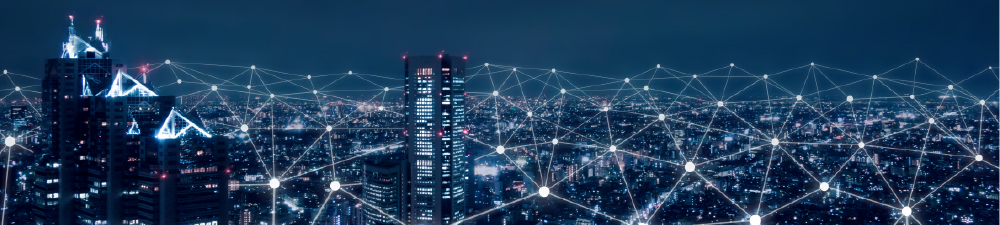

# Mini Project 3  - IU 4.6 Machine Learning

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_columns', None)
from scipy.stats import shapiro
import scipy.stats as stats

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt
import sklearn.metrics as metrics

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [2]:
cust_df=pd.read_csv("Mini_project_3_Data.csv")

## Exercise

## Placeholder for your analysis

In [3]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
cust_df
cust_df.shape
cust_df.dtypes

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,LAXSFN818,2.0,2.0,526.0,68.0,64.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,LAXCDG310,2.0,2.0,464.0,48.0,48.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,LAXCDG310,3.0,2.0,378.0,36.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,NEVPOW619,2.0,2.0,433.0,32.0,0.0,Yes,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,9,No,0,30,No,5-Low,Other,Other,No


(51047, 58)

CustomerID                     int64
Churn                         object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
H

In [4]:
for col in cust_df.columns:
    cust_df[col].value_counts()

3000002    1
3271254    1
3271274    1
3271278    1
3271282    1
          ..
3133254    1
3133258    1
3133266    1
3133270    1
3399994    1
Name: CustomerID, Length: 51047, dtype: int64

No     36336
Yes    14711
Name: Churn, dtype: int64

29.99     1069
34.99      806
10.00      469
30.00      404
49.99      392
          ... 
118.03       1
230.65       1
194.90       1
119.77       1
109.96       1
Name: MonthlyRevenue, Length: 12665, dtype: int64

0.0       723
2.0       138
8.0       127
6.0       122
88.0      116
         ... 
2252.0      1
2391.0      1
3129.0      1
4578.0      1
2437.0      1
Name: MonthlyMinutes, Length: 2719, dtype: int64

30.0     7302
45.0     6630
60.0     4435
40.0     4415
50.0     4143
         ... 
149.0       1
302.0       1
281.0       1
207.0       1
212.0       1
Name: TotalRecurringCharge, Length: 214, dtype: int64

0.00     24512
0.25      6757
0.50      3948
0.74      2748
0.99      1993
         ...  
5.28         1
45.05        1
18.32        1
32.17        1
9.57         1
Name: DirectorAssistedCalls, Length: 146, dtype: int64

0.0       23262
2.0        1088
1.0        1018
4.0         847
6.0         693
          ...  
741.0         1
604.0         1
412.0         1
409.0         1
2018.0        1
Name: OverageMinutes, Length: 746, dtype: int64

0.0      34947
0.2       1744
0.1       1444
0.3       1177
0.5        836
         ...  
48.2         1
92.1         1
330.2        1
52.4         1
55.6         1
Name: RoamingCalls, Length: 530, dtype: int64

 0.0       1124
-2.0        430
-4.0        369
-8.0        346
 2.0        338
           ... 
-1509.0       1
-863.0        1
-1087.0       1
 1358.0       1
 1578.0       1
Name: PercChangeMinutes, Length: 2262, dtype: int64

 0.0      5818
-0.2      1497
-0.3      1365
-0.5       883
-0.4       697
          ... 
 401.5       1
-134.6       1
 115.3       1
 372.5       1
-253.9       1
Name: PercChangeRevenues, Length: 2899, dtype: int64

0.0      7738
0.7      2615
0.3      2540
1.3      2294
1.0      2290
         ... 
9.5         1
83.3        1
87.3        1
98.7        1
101.7       1
Name: DroppedCalls, Length: 285, dtype: int64

0.0      13912
0.3       5254
0.7       4526
1.0       2966
1.3       2633
         ...  
139.0        1
174.3        1
147.7        1
124.0        1
103.7        1
Name: BlockedCalls, Length: 373, dtype: int64

0.0      4990
0.7       607
1.3       579
0.3       550
2.0       550
         ... 
330.7       1
370.0       1
259.7       1
263.0       1
287.0       1
Name: UnansweredCalls, Length: 840, dtype: int64

0.0      28020
0.3       3613
0.7       2736
1.0       1785
1.3       1616
         ...  
93.0         1
273.0        1
75.0         1
52.7         1
132.3        1
Name: CustomerCareCalls, Length: 185, dtype: int64

0.0     37133
0.3      6109
0.7      3183
1.0      1388
1.3       896
        ...  
30.3        1
66.0        1
26.0        1
19.3        1
65.3        1
Name: ThreewayCalls, Length: 78, dtype: int64

0.0       6337
0.1        241
0.2        225
0.3        183
0.6        164
          ... 
855.8        1
658.7        1
875.5        1
738.0        1
1225.3       1
Name: ReceivedCalls, Length: 6121, dtype: int64

0.0      6428
0.3       944
0.7       903
1.3       717
1.0       713
         ... 
277.3       1
325.3       1
313.7       1
232.7       1
430.3       1
Name: OutboundCalls, Length: 787, dtype: int64

0.0      14999
0.3       2883
0.7       2390
1.0       1657
1.3       1557
         ...  
137.3        1
270.0        1
131.7        1
190.0        1
163.7        1
Name: InboundCalls, Length: 472, dtype: int64

0.0       4224
0.3        194
0.7        164
2.7        159
3.3        143
          ... 
465.0        1
692.0        1
665.7        1
547.0        1
1359.0       1
Name: PeakCallsInOut, Length: 1839, dtype: int64

0.0      4547
0.7       333
1.3       305
2.7       298
0.3       291
         ... 
461.0       1
350.3       1
747.3       1
811.7       1
910.3       1
Name: OffPeakCallsInOut, Length: 1669, dtype: int64

0.0      5793
1.3      1506
0.7      1492
2.0      1441
0.3      1379
         ... 
171.0       1
288.3       1
108.7       1
161.0       1
99.0        1
Name: DroppedBlockedCalls, Length: 447, dtype: int64

0.0     50813
0.3       101
0.7        50
1.0        18
2.0        13
1.3        11
2.3         8
1.7         5
3.7         3
2.7         2
4.0         2
5.0         2
55.7        1
21.0        1
5.3         1
3.0         1
12.0        1
81.3        1
22.0        1
10.7        1
8.7         1
26.3        1
11.0        1
31.3        1
6.3         1
33.7        1
16.0        1
9.7         1
51.7        1
23.7        1
12.3        1
Name: CallForwardingCalls, dtype: int64

0.0      25029
0.3       5427
0.7       3759
1.0       2316
1.3       1872
         ...  
63.0         1
80.0         1
64.3         1
105.3        1
86.3         1
Name: CallWaitingCalls, Length: 223, dtype: int64

11    3599
7     2821
12    2737
13    2719
9     2477
10    2381
14    2291
8     2214
19    2004
15    1871
23    1836
21    1809
16    1778
17    1749
25    1611
18    1509
20    1413
22    1269
24    1174
26    1022
27     935
29     899
31     863
6      746
28     741
33     717
30     700
35     685
32     589
34     543
37     466
36     425
38     286
39     240
41     210
40     175
43     174
42     151
45     144
44     140
47     124
48     117
49     111
46     110
53      90
50      84
51      64
52      57
54      50
55      43
57      25
56      20
59      20
58      11
60       7
61       1
Name: MonthsInService, dtype: int64

1      32109
2      13852
3       3212
4       1219
5        421
6        147
7         49
9         12
8         10
10         6
12         3
11         3
13         2
18         1
196        1
Name: UniqueSubs, dtype: int64

1     36267
2     12223
3      1907
4       444
5       144
0        39
6        13
8         5
7         2
9         1
53        1
11        1
Name: ActiveSubs, dtype: int64

NYCBRO917    1684
HOUHOU281    1510
DALDAL214    1498
NYCMAN917    1182
APCFCH703     783
             ... 
OHIRAV330       1
OMANEW515       1
KCYHES316       1
AIRGEO843       1
NCRDNN910       1
Name: ServiceArea, Length: 747, dtype: int64

1.0     28852
2.0     12708
3.0      5072
4.0      2232
5.0      1033
6.0       487
7.0       297
8.0       147
9.0        82
10.0       38
11.0       35
12.0       19
13.0       16
14.0        7
16.0        5
15.0        3
19.0        3
17.0        3
24.0        2
18.0        2
21.0        1
22.0        1
20.0        1
Name: Handsets, dtype: int64

1.0     31881
2.0     13028
3.0      4129
4.0      1278
5.0       449
6.0       173
7.0        59
8.0        24
9.0        16
10.0        6
11.0        1
15.0        1
14.0        1
Name: HandsetModels, dtype: int64

202.0     159
313.0     156
212.0     149
199.0     147
308.0     147
         ... 
1438.0      1
1381.0      1
1443.0      1
1276.0      1
1219.0      1
Name: CurrentEquipmentDays, Length: 1438, dtype: int64

0.0     13917
46.0     2149
42.0     2074
50.0     2063
48.0     2055
44.0     2037
40.0     1979
52.0     1968
38.0     1967
36.0     1889
30.0     1875
32.0     1826
34.0     1823
54.0     1719
28.0     1657
26.0     1392
56.0     1382
58.0     1237
24.0      859
60.0      811
22.0      543
62.0      476
64.0      402
66.0      308
68.0      281
20.0      261
70.0      248
72.0      227
74.0      167
76.0      137
78.0      102
80.0       81
82.0       57
18.0       44
84.0       44
86.0       29
88.0       23
90.0       12
94.0        7
92.0        6
98.0        2
99.0        1
96.0        1
Name: AgeHH1, dtype: int64

0.0     26087
46.0     1487
48.0     1419
44.0     1411
50.0     1335
42.0     1330
52.0     1295
40.0     1292
38.0     1218
36.0     1193
34.0     1131
32.0     1120
30.0     1081
54.0     1075
28.0      896
56.0      737
26.0      729
24.0      655
58.0      590
60.0      525
62.0      447
22.0      445
64.0      366
20.0      351
66.0      313
68.0      269
70.0      227
72.0      188
18.0      179
74.0      169
76.0      127
78.0      119
80.0      107
82.0       58
86.0       37
84.0       34
90.0       29
88.0       27
96.0       11
98.0       10
94.0       10
92.0        8
99.0        1
Name: AgeHH2, dtype: int64

No     38679
Yes    12368
Name: ChildrenInHH, dtype: int64

No     43956
Yes     7091
Name: HandsetRefurbished, dtype: int64

Yes    46046
No      5001
Name: HandsetWebCapable, dtype: int64

No     41524
Yes     9523
Name: TruckOwner, dtype: int64

No     46894
Yes     4153
Name: RVOwner, dtype: int64

Known      33987
Unknown    17060
Name: Homeownership, dtype: int64

No     32596
Yes    18451
Name: BuysViaMailOrder, dtype: int64

No     31821
Yes    19226
Name: RespondsToMailOffers, dtype: int64

No     50295
Yes      752
Name: OptOutMailings, dtype: int64

No     48168
Yes     2879
Name: NonUSTravel, dtype: int64

No     41583
Yes     9464
Name: OwnsComputer, dtype: int64

Yes    34503
No     16544
Name: HasCreditCard, dtype: int64

0    49302
1     1609
2      120
3       14
4        2
Name: RetentionCalls, dtype: int64

0    50166
1      837
2       36
3        8
Name: RetentionOffersAccepted, dtype: int64

No     41223
Yes     9824
Name: NewCellphoneUser, dtype: int64

No     44012
Yes     7035
Name: NotNewCellphoneUser, dtype: int64

0     48663
1      2244
2       100
3        21
4         6
6         4
7         2
5         2
16        1
11        1
8         1
9         1
35        1
Name: ReferralsMadeBySubscriber, dtype: int64

0    12835
6     9607
7     5877
9     5563
5     4262
4     4053
3     2991
8     2622
1     2039
2     1198
Name: IncomeGroup, dtype: int64

No     50368
Yes      679
Name: OwnsMotorcycle, dtype: int64

0     49209
1      1401
2       248
3        92
4        34
5        30
6         8
8         7
7         6
9         4
11        3
10        2
25        1
21        1
12        1
Name: AdjustmentsToCreditRating, dtype: int64

Unknown    28982
30          7328
150         4115
130         2105
80          1960
10          1928
60          1776
200         1266
100         1235
40           249
400           46
250           20
300           13
180           10
500            8
240            6
Name: HandsetPrice, dtype: int64

No     49302
Yes     1745
Name: MadeCallToRetentionTeam, dtype: int64

2-High       18993
1-Highest     8522
3-Good        8410
5-Low         6499
4-Medium      5357
7-Lowest      2114
6-VeryLow     1152
Name: CreditRating, dtype: int64

Other       24655
Suburban    16378
Town         7589
Rural        2425
Name: PrizmCode, dtype: int64

Other           37637
Professional     8755
Crafts           1519
Clerical          986
Self              879
Retired           733
Student           381
Homemaker         157
Name: Occupation, dtype: int64

Unknown    19700
Yes        18651
No         12696
Name: MaritalStatus, dtype: int64

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [5]:
#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis

zero_revenue = cust_df.loc[(cust_df['MonthlyRevenue'] == 0.0)]
zero_revenue_count = (cust_df['MonthlyRevenue'] == 0.0).sum()
print('There are', zero_revenue_count, 'customers with zero monthly revenue.')

cust_df2 = cust_df.drop(zero_revenue.index)
cust_df2.shape

There are 6 customers with zero monthly revenue.


(51041, 58)

There are 6 customers with zero monthly revenue.

### Q1.2 How many columns has missing values percentage > 5%

In [6]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
#What strategy should be used for imputation?

cust_df2.isnull().sum()/(len(cust_df))*100

CustomerID                   0.000000
Churn                        0.000000
MonthlyRevenue               0.305601
MonthlyMinutes               0.305601
TotalRecurringCharge         0.305601
DirectorAssistedCalls        0.305601
OverageMinutes               0.305601
RoamingCalls                 0.305601
PercChangeMinutes            0.715027
PercChangeRevenues           0.715027
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea 

In [7]:
cust_df2.fillna(cust_df2.mean(),inplace=True)
cust_df2

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00000,219.000000,22.00000,0.250000,0.000000,0.00000,-157.00000,-19.000000,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99000,10.000000,17.00000,0.000000,0.000000,0.00000,-4.00000,0.000000,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00000,8.000000,38.00000,0.000000,0.000000,0.00000,-2.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28000,1312.000000,75.00000,1.240000,0.000000,0.00000,157.00000,8.100000,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14000,0.000000,17.00000,0.000000,0.000000,0.00000,0.00000,-0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,58.84143,525.712744,46.83502,0.895335,40.032505,1.23639,-11.54882,-1.192079,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,LAXSFN818,2.0,2.0,526.0,68.0,64.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17000,1745.000000,85.00000,0.990000,45.000000,4.70000,122.00000,15.900000,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,LAXCDG310,2.0,2.0,464.0,48.0,48.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,58.84143,525.712744,46.83502,0.895335,40.032505,1.23639,-11.54882,-1.192079,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,LAXCDG310,3.0,2.0,378.0,36.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,58.84143,525.712744,46.83502,0.895335,40.032505,1.23639,-11.54882,-1.192079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,NEVPOW619,2.0,2.0,433.0,32.0,0.0,Yes,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,9,No,0,30,No,5-Low,Other,Other,No


<mark>__Result:__
    
There are no columns with missing values > 5%.    
I am using the mean of the respective columns to impute the missing values to give more emphasis on the mean value.

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

<AxesSubplot:>

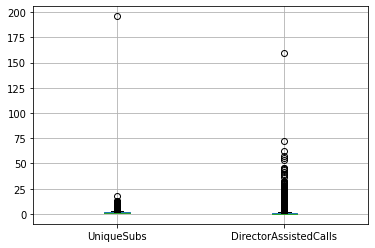

In [8]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df2.boxplot(column=cols)

In [9]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers
outliers_top_1_percent = (cust_df2[cols].quantile(q=1))
outliers_top_1_percent

UniqueSubs               196.00
DirectorAssistedCalls    159.39
Name: 1.0, dtype: float64

,UniqueSubs,DirectorAssistedCalls
5970,2,159.39
23267,196,0.00


<AxesSubplot:>

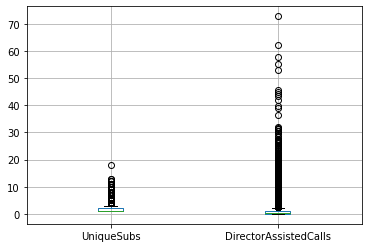

In [10]:
outliers = cust_df2[(cust_df2['UniqueSubs'] > 190) | (cust_df2['DirectorAssistedCalls'] > 159)]
outliers[cols]

cust_df2.drop(outliers.index, inplace=True)
cust_df2.boxplot(column=cols)

#cust_df2.drop(5970, 23267)

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

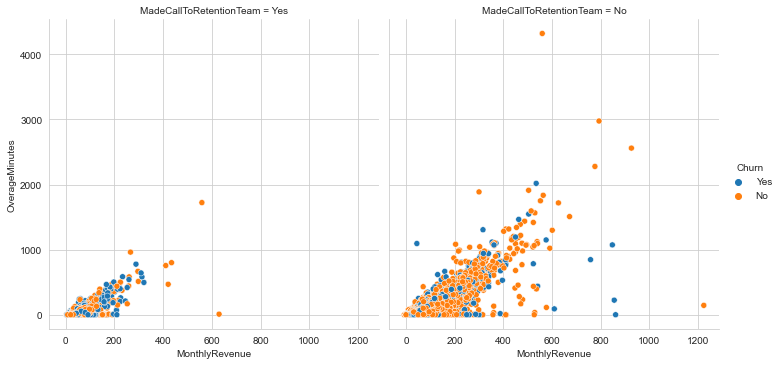

In [11]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.set_style("whitegrid")
sns.relplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df,hue='Churn',col='MadeCallToRetentionTeam');

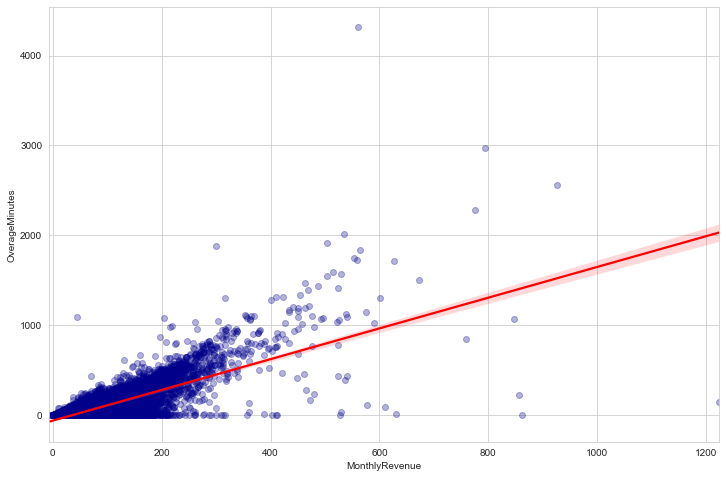

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
sns.regplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df, line_kws = {'color': 'red'},scatter_kws = {'color': 'darkblue', 'alpha': 0.3});

<mark>__Result:__
    
Overage minutes has a small positive correlation to monthly revenue. More overage minutes returns more monthly revenue.

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

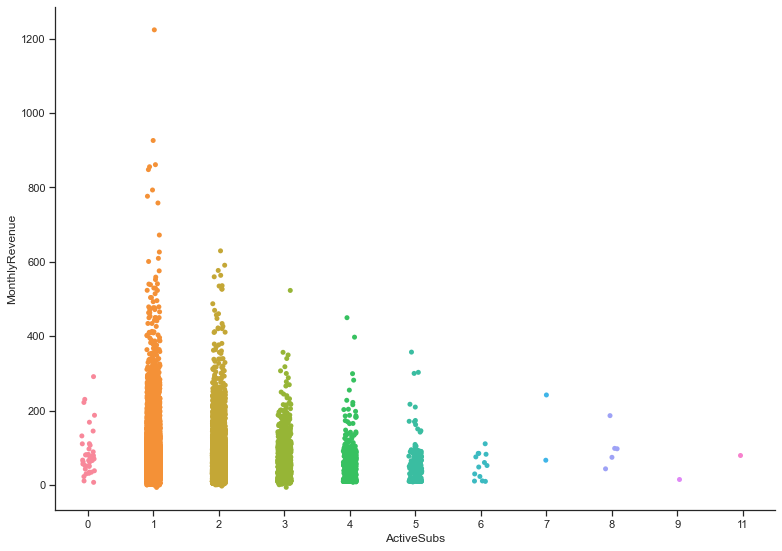

In [13]:
#use category plot to plot monthly revenue for each active subs category
cust_df2.ActiveSubs.value_counts()
sns.set_theme(style="ticks", color_codes=True)
g=sns.catplot(data = cust_df2, x = 'ActiveSubs', y= 'MonthlyRevenue')
g.fig.set_size_inches(12,8);

<mark>__Result:__
    
From the above chart, we can see that monthly revenue decreases as number of active subs increases.

### Q2.3 Does credit rating have an impact in churn rate?

In [14]:
cust_df[['CreditRating','Churn']]

,CreditRating,Churn
0,1-Highest,Yes
1,4-Medium,Yes
2,3-Good,No
3,4-Medium,No
4,1-Highest,Yes
...,...,...
51042,1-Highest,Yes
51043,3-Good,No
51044,5-Low,Yes
51045,5-Low,No


<AxesSubplot:xlabel='CreditRating'>

Churn,No,Yes
CreditRating,,
1-Highest,0.691549,0.308451
2-High,0.699242,0.300758
3-Good,0.689893,0.310107
4-Medium,0.738984,0.261016
5-Low,0.779095,0.220905
6-VeryLow,0.726325,0.273675
7-Lowest,0.710501,0.289499


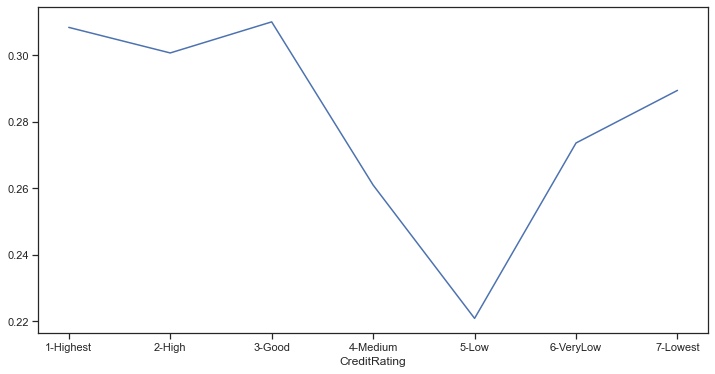

In [15]:
credit_rating_df = pd.crosstab(cust_df2.CreditRating, cust_df2.Churn).apply(lambda r: r/r.sum(), axis=1)
credit_rating_df.Yes.plot(figsize=(12,6))
credit_rating_df

<mark>__Result:__
    
Credit rating has an impact in churn rate. From the graph above, credit rating of highest to good has higher churn rate at between 30% to 31%. 5-Low in credit ratings has the lowest churn rate at 22%.

### Placeholder for additional exploratory analysis

Type your codes here for any additional exploratory analysis (if any)

In [16]:
num_cols = ['MonthlyRevenue','MonthlyMinutes','TotalRecurringCharge','DirectorAssistedCalls',
            'OverageMinutes','RoamingCalls','PercChangeMinutes','PercChangeRevenues',
            'DroppedCalls','BlockedCalls','UnansweredCalls','CustomerCareCalls','ThreewayCalls',
            'ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut','OffPeakCallsInOut',
            'DroppedBlockedCalls','CallForwardingCalls','CallWaitingCalls','MonthsInService',
            'Handsets','HandsetModels','CurrentEquipmentDays','AgeHH1','AgeHH2','HandsetPrice',
            'ReferralsMadeBySubscriber','AdjustmentsToCreditRating','IncomeGroup',
            'PercChangeMinutes','PercChangeRevenues','UniqueSubs','ActiveSubs',
            'Handsets','HandsetModels',]
cat_cols = ['ChildrenInHH','HandsetRefurbished','HandsetWebCapable',
            'TruckOwner','RVOwner','Homeownership','BuysViaMailOrder',
            'RespondsToMailOffers','OptOutMailings','NonUSTravel',
            'OwnsComputer','HasCreditCard','RetentionCalls','RetentionOffersAccepted',
            'NewCellphoneUser','NotNewCellphoneUser','IncomeGroup',
            'OwnsMotorcycle',
            'MadeCallToRetentionTeam','CreditRating','PrizmCode',
            'Occupation','MaritalStatus','AdjustmentsToCreditRating']

In [17]:
#find average churn rate of each columns and also each sub-categories
churn_rate = cust_df2.groupby('Churn').sum().apply(lambda r: r/r.sum(), axis=0)
churn_rate.transpose()
for col in cat_cols:
    
    pd.crosstab(cust_df2[col], cust_df2.Churn).apply(lambda r: r/r.sum(), axis=1)

Churn,No,Yes
CustomerID,0.712514,0.287486
MonthlyRevenue,0.715874,0.284126
MonthlyMinutes,0.734564,0.265436
TotalRecurringCharge,0.725901,0.274099
DirectorAssistedCalls,0.732808,0.267192
OverageMinutes,0.693733,0.306267
RoamingCalls,0.672802,0.327198
PercChangeMinutes,0.368446,0.631554
PercChangeRevenues,0.877153,0.122847
DroppedCalls,0.722195,0.277805


Churn,No,Yes
ChildrenInHH,,
No,0.714289,0.285711
Yes,0.704132,0.295868


Churn,No,Yes
HandsetRefurbished,,
No,0.717280,0.282720
Yes,0.678043,0.321957


Churn,No,Yes
HandsetWebCapable,,
No,0.626325,0.373675
Yes,0.721112,0.278888


Churn,No,Yes
TruckOwner,,
No,0.710786,0.289214
Yes,0.716371,0.283629


Churn,No,Yes
RVOwner,,
No,0.711364,0.288636
Yes,0.717072,0.282928


Churn,No,Yes
Homeownership,,
Known,0.716013,0.283987
Unknown,0.703489,0.296511


Churn,No,Yes
BuysViaMailOrder,,
No,0.704431,0.295569
Yes,0.724893,0.275107


Churn,No,Yes
RespondsToMailOffers,,
No,0.703747,0.296253
Yes,0.725202,0.274798


Churn,No,Yes
OptOutMailings,,
No,0.711834,0.288166
Yes,0.711436,0.288564


Churn,No,Yes
NonUSTravel,,
No,0.711503,0.288497
Yes,0.717263,0.282737


Churn,No,Yes
OwnsComputer,,
No,0.711396,0.288604
Yes,0.713727,0.286273


Churn,No,Yes
HasCreditCard,,
No,0.706210,0.293790
Yes,0.714522,0.285478


Churn,No,Yes
RetentionCalls,,
0,0.717572,0.282428
1,0.550031,0.449969
2,0.558333,0.441667
3,0.500000,0.500000
4,0.000000,1.000000


Churn,No,Yes
RetentionOffersAccepted,,
0,0.713984,0.286016
1,0.590203,0.409797
2,0.555556,0.444444
3,0.625000,0.375000


Churn,No,Yes
NewCellphoneUser,,
No,0.710130,0.289870
Yes,0.718954,0.281046


Churn,No,Yes
NotNewCellphoneUser,,
No,0.713046,0.286954
Yes,0.704209,0.295791


Churn,No,Yes
IncomeGroup,,
0,0.697787,0.302213
1,0.708681,0.291319
2,0.703673,0.296327
3,0.736877,0.263123
4,0.723457,0.276543
5,0.717203,0.282797
6,0.716427,0.283573
7,0.702059,0.297941
8,0.723494,0.276506


Churn,No,Yes
OwnsMotorcycle,,
No,0.712212,0.287788
Yes,0.683358,0.316642


Churn,No,Yes
MadeCallToRetentionTeam,,
No,0.717572,0.282428
Yes,0.549570,0.450430


Churn,No,Yes
CreditRating,,
1-Highest,0.691549,0.308451
2-High,0.699242,0.300758
3-Good,0.689893,0.310107
4-Medium,0.738984,0.261016
5-Low,0.779095,0.220905
6-VeryLow,0.726325,0.273675
7-Lowest,0.710501,0.289499


Churn,No,Yes
PrizmCode,,
Other,0.713753,0.286247
Rural,0.682887,0.317113
Suburban,0.718656,0.281344
Town,0.700092,0.299908


Churn,No,Yes
Occupation,,
Clerical,0.706897,0.293103
Crafts,0.719552,0.280448
Homemaker,0.675159,0.324841
Other,0.709567,0.290433
Professional,0.718186,0.281814
Retired,0.747613,0.252387
Self,0.723549,0.276451
Student,0.690289,0.309711


Churn,No,Yes
MaritalStatus,,
No,0.728927,0.271073
Unknown,0.698198,0.301802
Yes,0.714584,0.285416


Churn,No,Yes
AdjustmentsToCreditRating,,
0,0.710459,0.289541
1,0.741429,0.258571
2,0.750000,0.250000
3,0.815217,0.184783
4,0.705882,0.294118
5,0.766667,0.233333
6,0.875000,0.125000
7,0.833333,0.166667
8,0.857143,0.142857


### Data Utils

In [18]:
def plot_violin(df, cols, col_x = 'Churn'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(x=col_x, y=col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

In [19]:
def plot_box(df, cols, col_x = 'Churn'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(x=col_x, y=col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

In [20]:
def plot_count(df, cols, col_x = 'Churn'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.countplot(x=col, data=df, hue='Churn', palette='Blues', linewidth=0.4, edgecolor='black')
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

In [21]:
def plot_count2(df, cols, col_x = 'Churn'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.countplot(x=col, data=df, hue='Churn', palette='Blues', linewidth=0.4, edgecolor='black')
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Count')# Set text for y axis
        plt.show()

In [22]:
cust_df2.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [23]:
#transform churn yes to 1 and non churn to 0
cust_df2['Churn'] = np.where(cust_df2['Churn'] == 'Yes', 1,0)

In [24]:
cust_df2['Churn'].value_counts()

0    36331
1    14708
Name: Churn, dtype: int64

In [25]:
#transform handsetprice 'Unknown' to 0 to become an int column for plotting
cust_df2['HandsetPrice'].replace({'Unknown':0},inplace=True)

### Boxplots

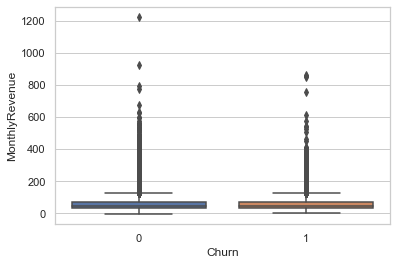

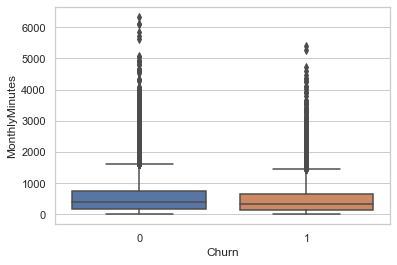

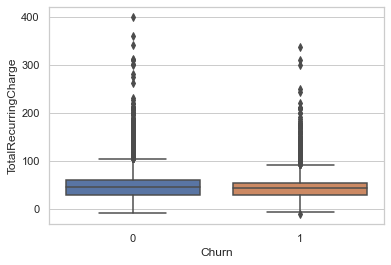

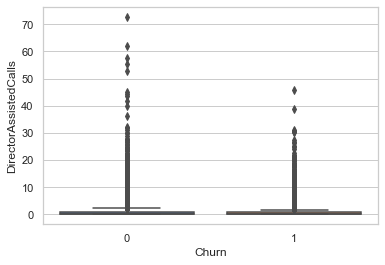

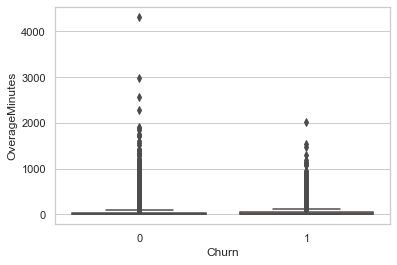

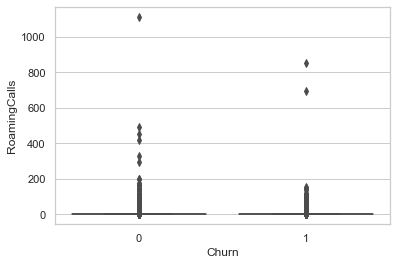

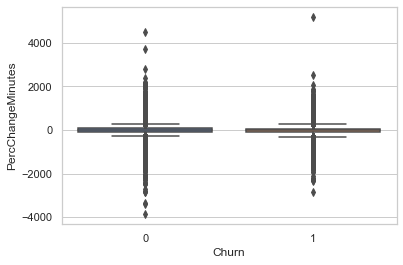

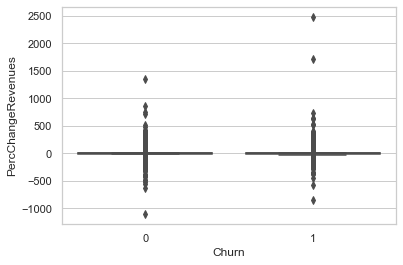

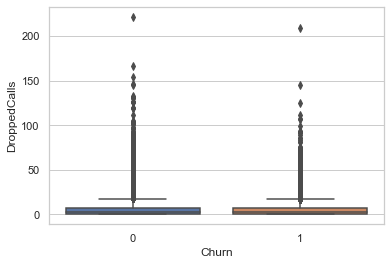

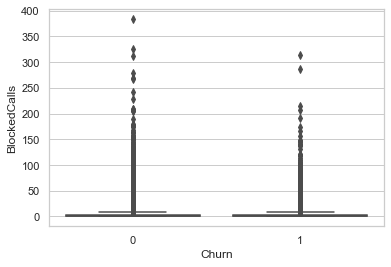

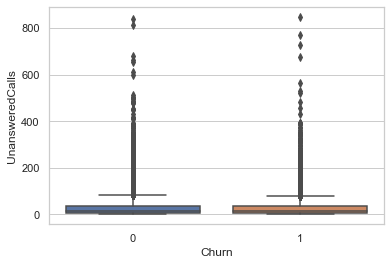

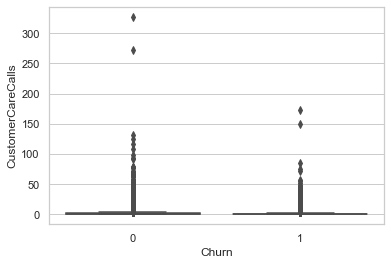

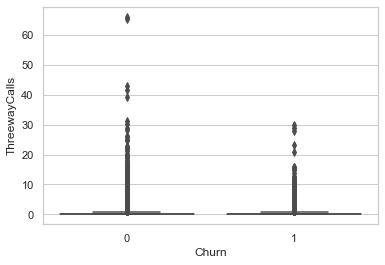

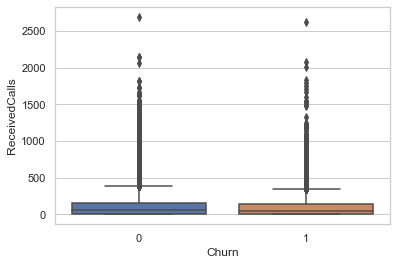

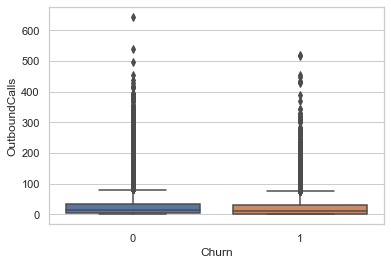

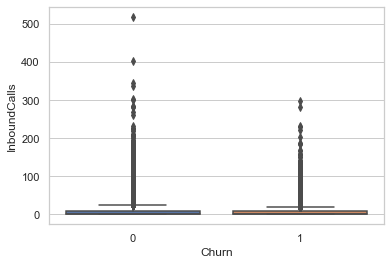

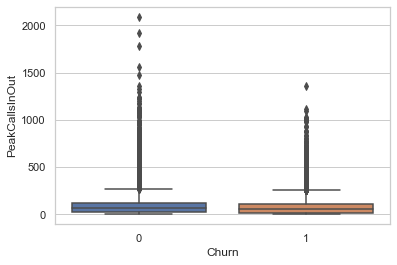

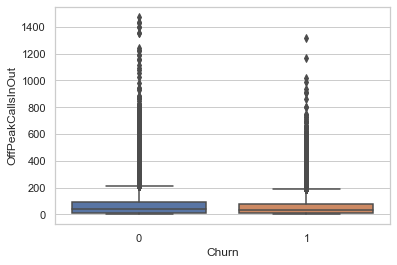

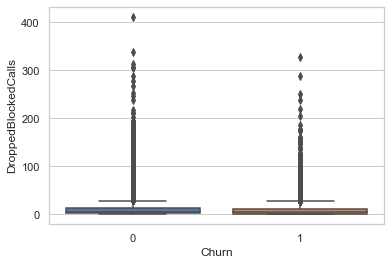

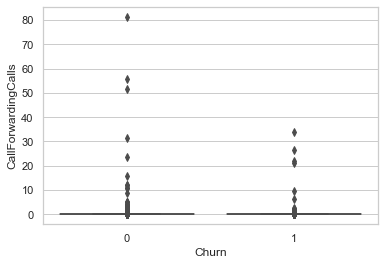

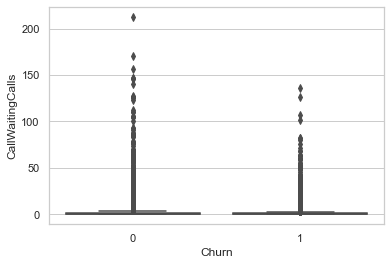

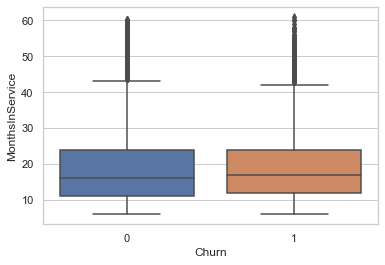

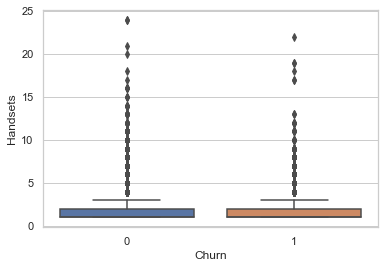

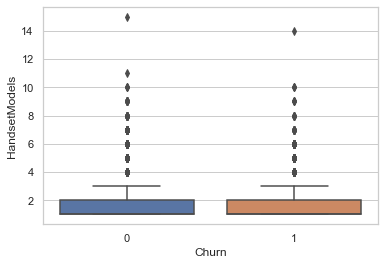

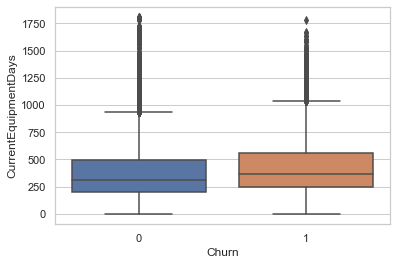

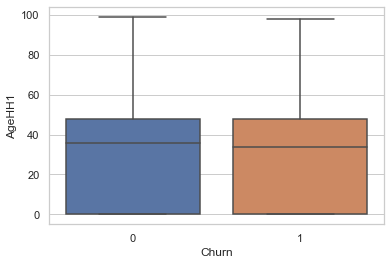

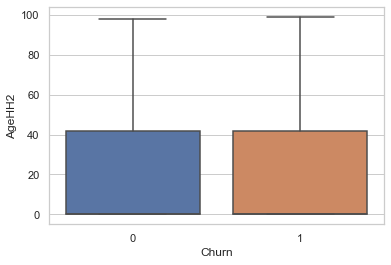

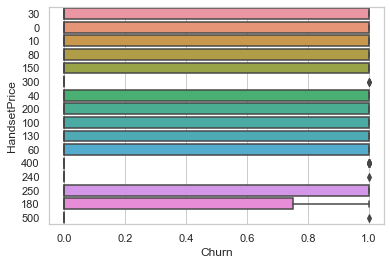

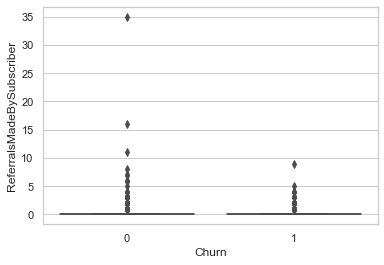

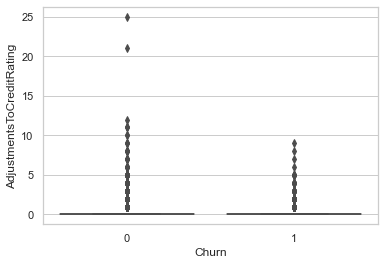

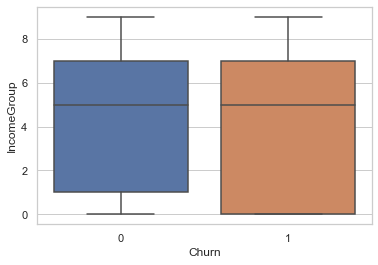

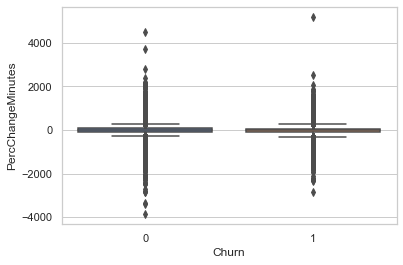

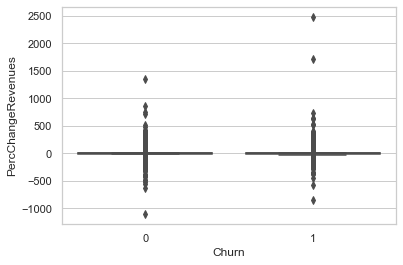

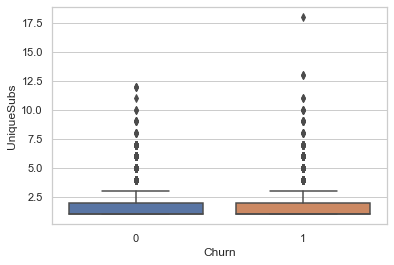

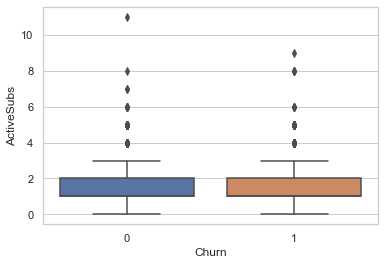

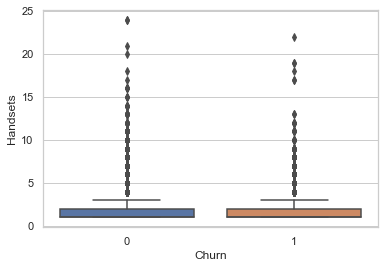

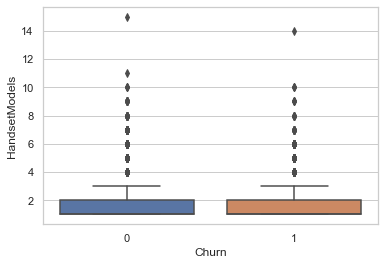

In [26]:
plot_box(cust_df2, num_cols)

### Violin plots

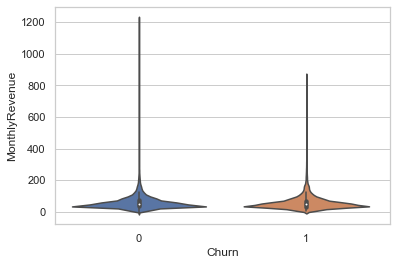

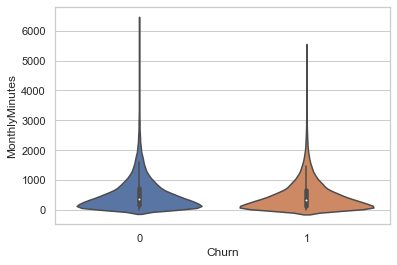

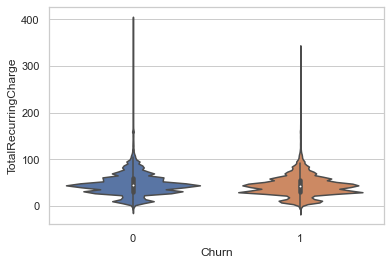

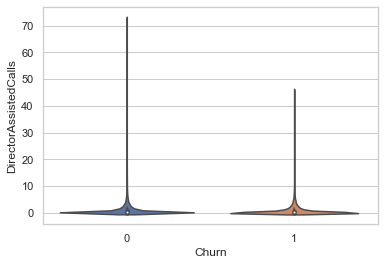

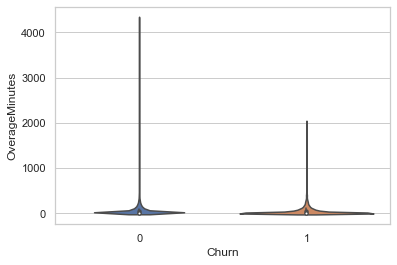

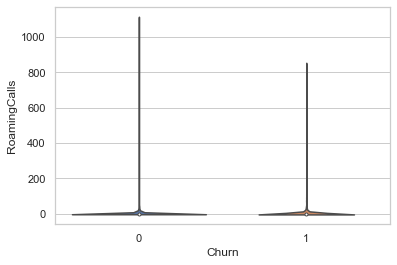

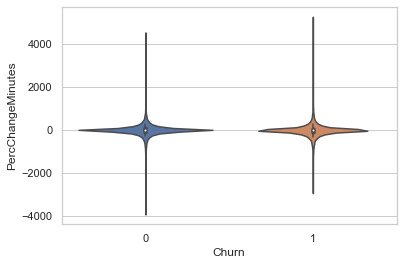

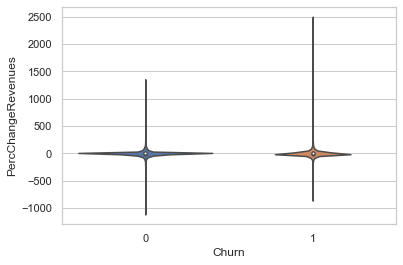

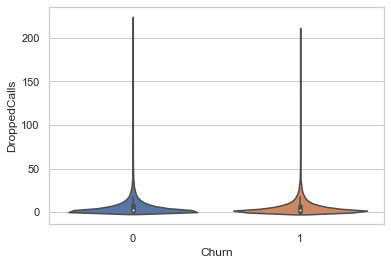

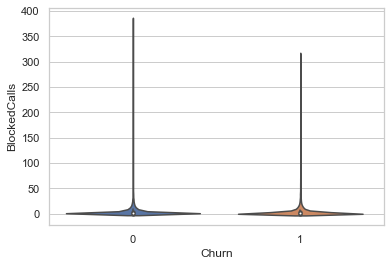

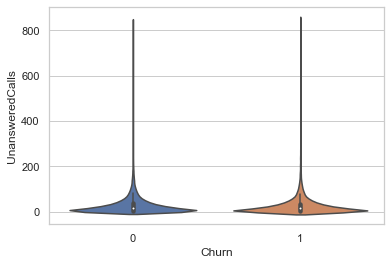

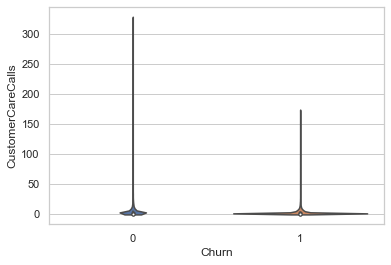

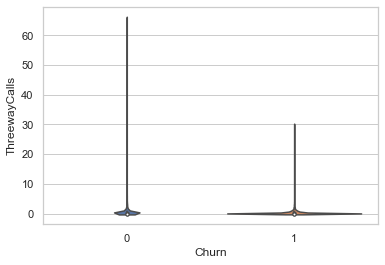

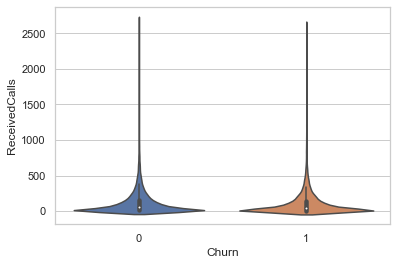

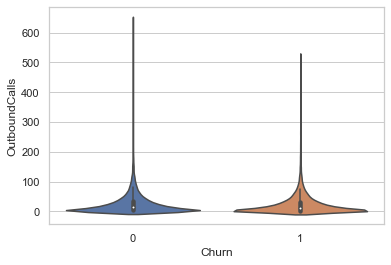

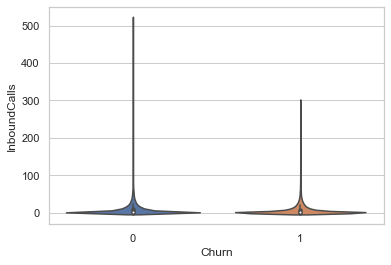

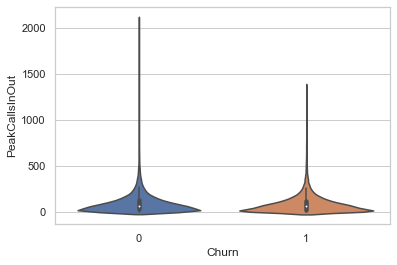

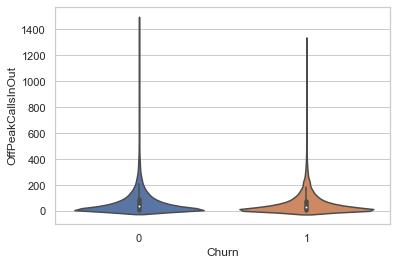

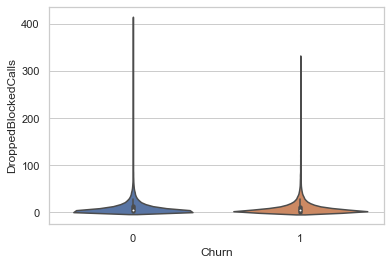

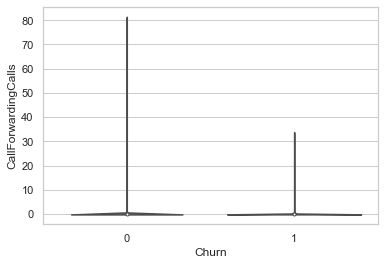

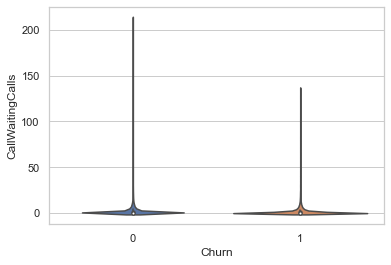

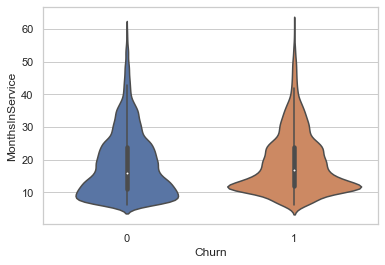

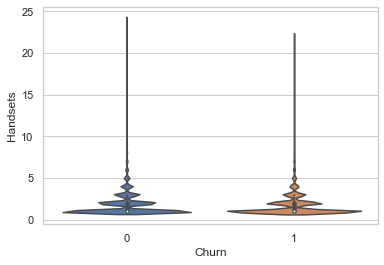

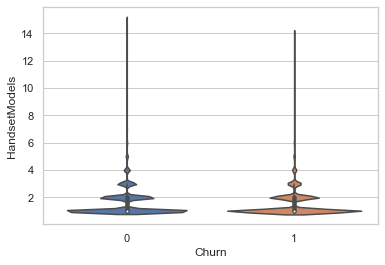

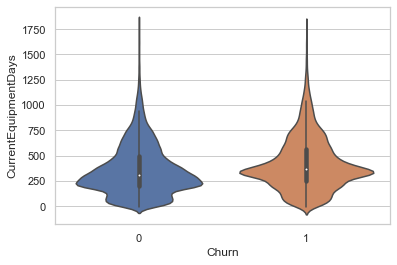

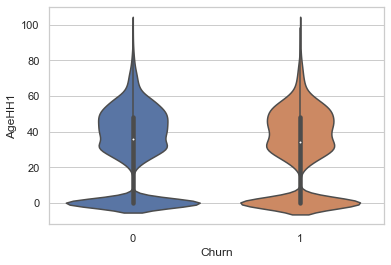

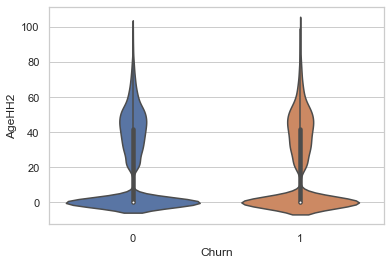

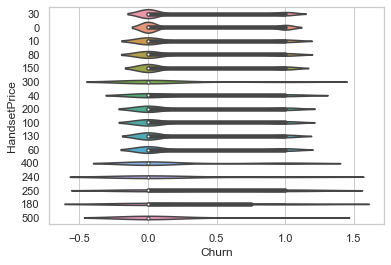

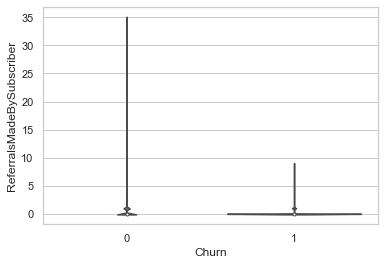

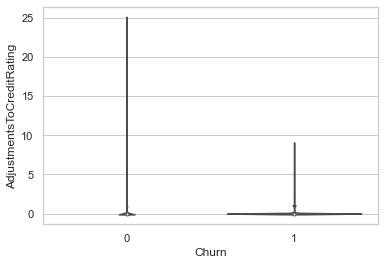

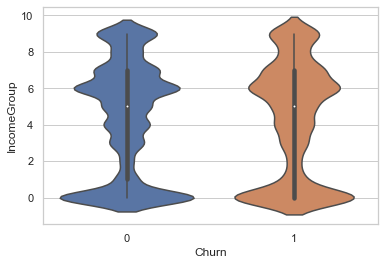

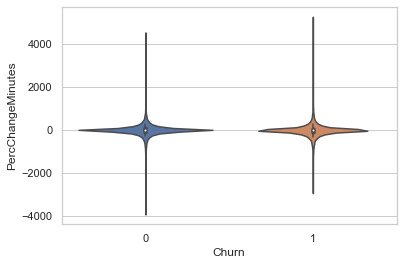

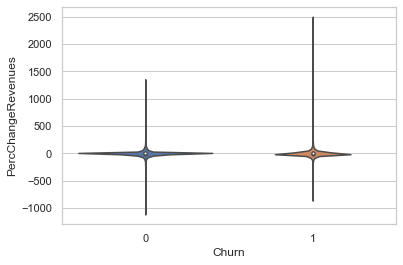

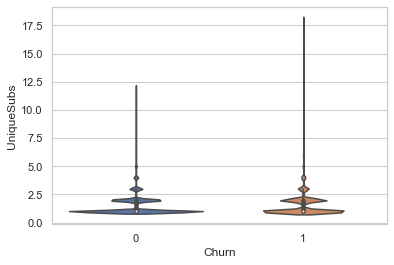

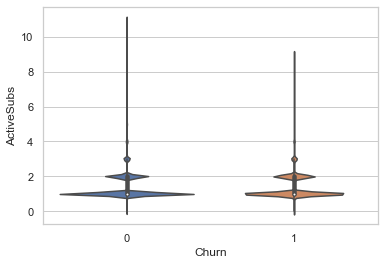

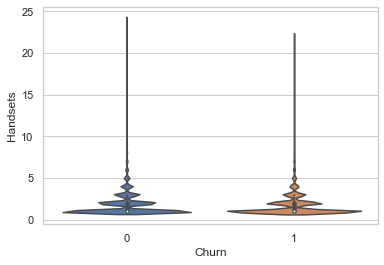

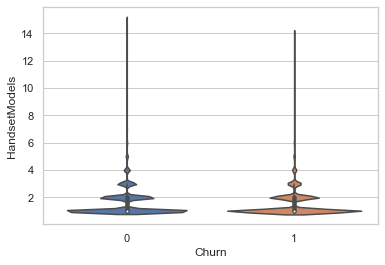

In [27]:
plot_violin(cust_df2, num_cols)

### Enlarge the plots which might be predictive to be more visible

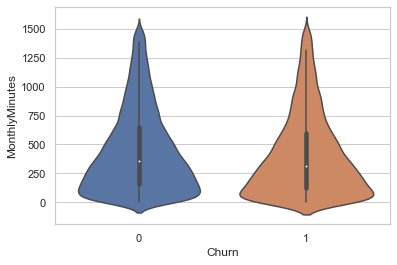

In [28]:
monthlyminutes_df = cust_df2[(cust_df2['MonthlyMinutes'] < 1500)]
sns.set_style("whitegrid")
sns.violinplot(x='Churn', y='MonthlyMinutes', data=monthlyminutes_df);

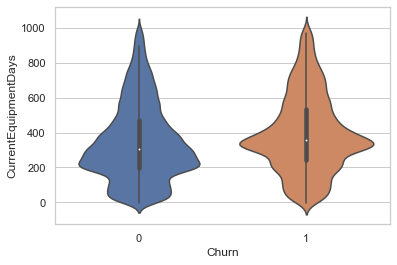

In [29]:
equipmentdays_df = cust_df2[(cust_df2['CurrentEquipmentDays'] < 1000)]
sns.set_style("whitegrid")
sns.violinplot(x='Churn', y='CurrentEquipmentDays', data=equipmentdays_df);

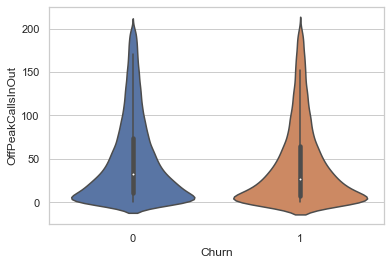

In [30]:
offpeak_df = cust_df2[(cust_df2['OffPeakCallsInOut'] < 200)]
sns.set_style("whitegrid")
sns.violinplot(x='Churn', y='OffPeakCallsInOut', data=offpeak_df);

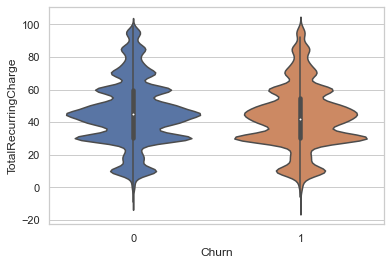

In [31]:
totalrecurring_df = cust_df2[(cust_df2['TotalRecurringCharge'] < 100)]
sns.set_style("whitegrid")
sns.violinplot(x='Churn', y='TotalRecurringCharge', data=totalrecurring_df);

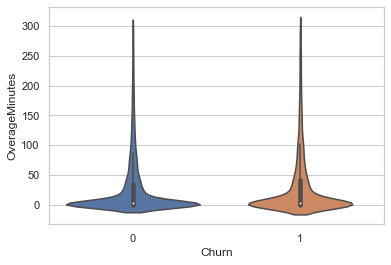

In [32]:
overage_df = cust_df2[(cust_df2['OverageMinutes'] < 300)]
sns.set_style("whitegrid")
sns.violinplot(x='Churn', y='OverageMinutes', data=overage_df);

### Bar plots for categorical features

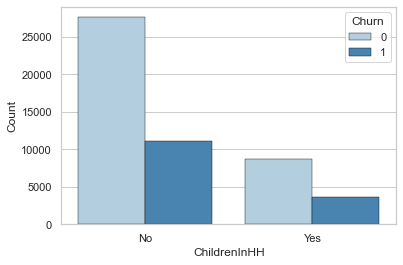

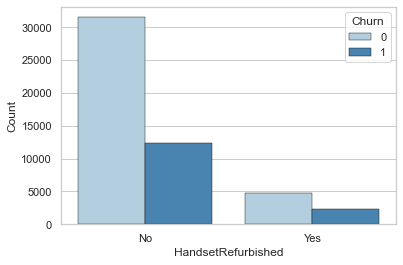

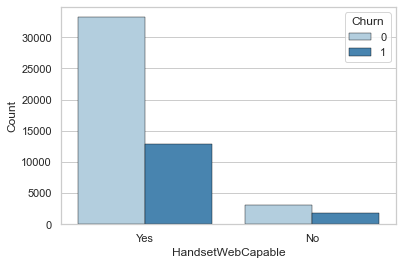

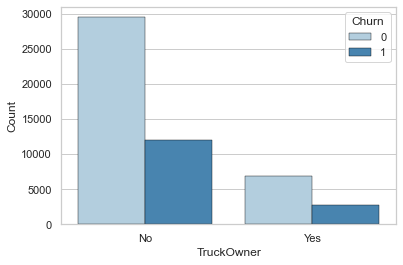

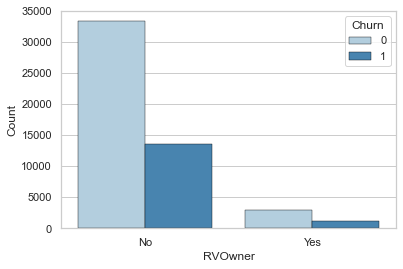

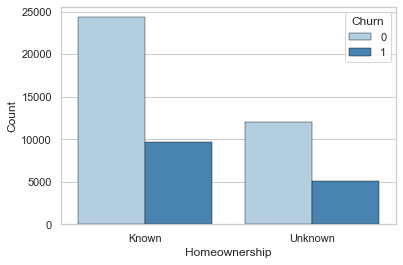

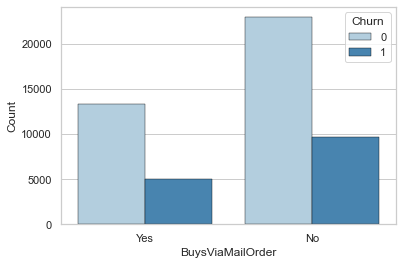

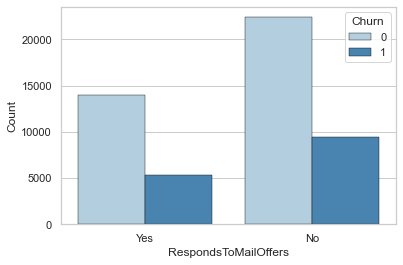

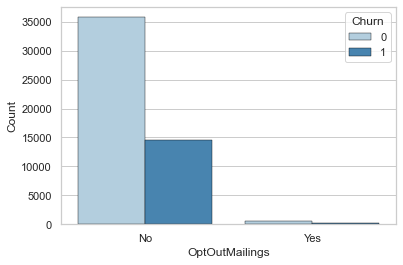

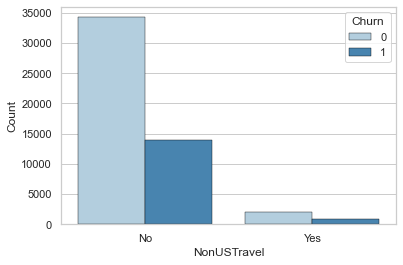

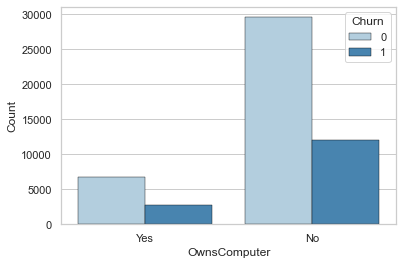

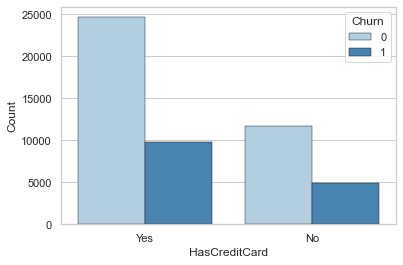

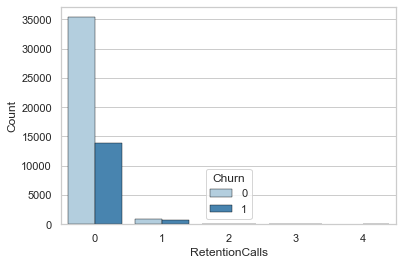

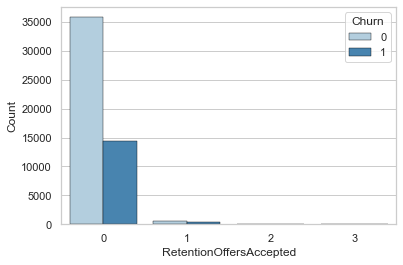

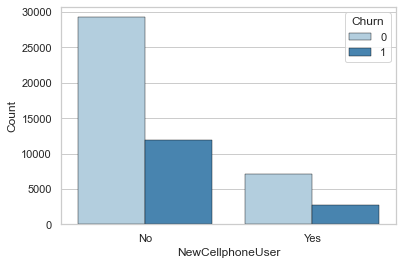

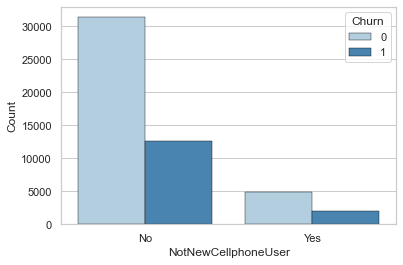

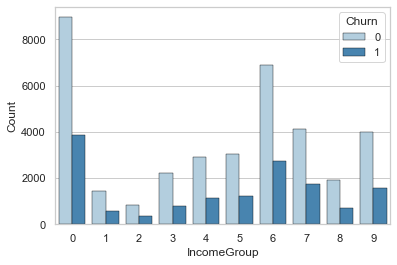

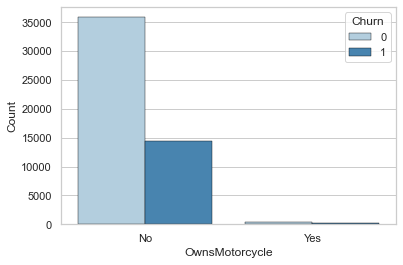

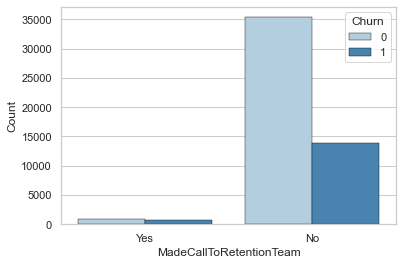

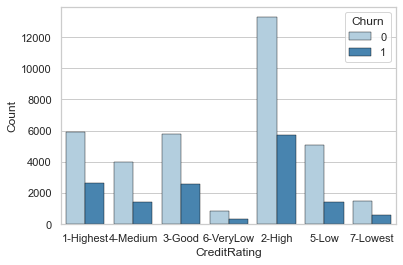

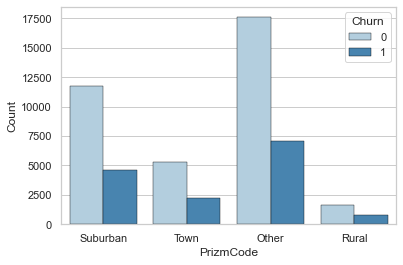

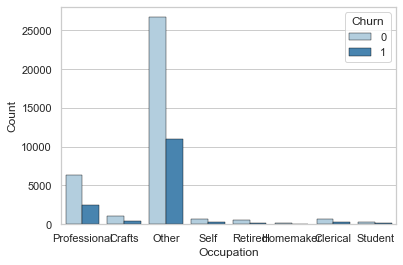

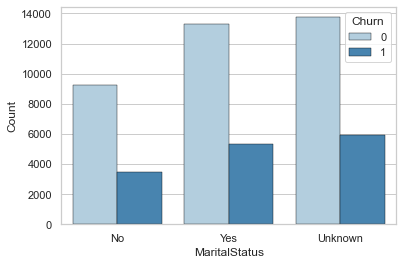

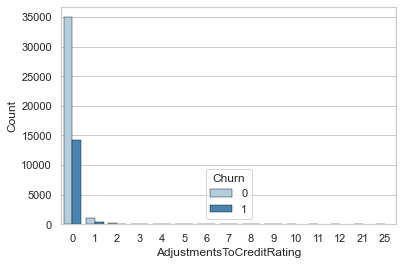

In [33]:
plot_count2(cust_df2, cat_cols)

## Q3. Create additional features to help predict churn

In [34]:
#wrapper function to create additional features for churn prediction
def create_features(df):
    
    #3.1 Percent of current active subs over total subs
    df['perc_active_subs'] = (df['ActiveSubs'] / df['UniqueSubs'])*100
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    df['perc_recurrent_charge']=(df['TotalRecurringCharge'] / df['MonthlyRevenue'])*100
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    df['perc_overage_minutes']=(df['OverageMinutes'] / df['MonthlyMinutes'])*100
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    
    
    return df

In [35]:
#Make a call to the feature engineering wrapper function for churn prediction
create_features(cust_df2)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,3000002,1,24.00000,219.000000,22.00000,0.250000,0.000000,0.00000,-157.00000,-19.000000,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No,50.0,91.666667,0.000000
1,3000010,1,16.99000,10.000000,17.00000,0.000000,0.000000,0.00000,-4.00000,0.000000,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes,100.0,100.058858,0.000000
2,3000014,0,38.00000,8.000000,38.00000,0.000000,0.000000,0.00000,-2.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,0,No,3-Good,Town,Crafts,Yes,100.0,100.000000,0.000000
3,3000022,0,82.28000,1312.000000,75.00000,1.240000,0.000000,0.00000,157.00000,8.100000,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No,100.0,91.152163,0.000000
4,3000026,1,17.14000,0.000000,17.00000,0.000000,0.000000,0.00000,0.00000,-0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes,100.0,99.183197,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,1,58.84143,525.712744,46.83502,0.895335,40.032505,1.23639,-11.54882,-1.192079,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,LAXSFN818,2.0,2.0,526.0,68.0,64.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes,100.0,79.595313,7.614901
51043,3399974,0,95.17000,1745.000000,85.00000,0.990000,45.000000,4.70000,122.00000,15.900000,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,LAXCDG310,2.0,2.0,464.0,48.0,48.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,0,9,No,1,60,No,3-Good,Other,Other,No,100.0,89.313859,2.578797
51044,3399978,1,58.84143,525.712744,46.83502,0.895335,40.032505,1.23639,-11.54882,-1.192079,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,LAXCDG310,3.0,2.0,378.0,36.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,1,80,No,5-Low,Other,Clerical,No,100.0,79.595313,7.614901
51045,3399990,0,58.84143,525.712744,46.83502,0.895335,40.032505,1.23639,-11.54882,-1.192079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,NEVPOW619,2.0,2.0,433.0,32.0,0.0,Yes,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,9,No,0,30,No,5-Low,Other,Other,No,100.0,79.595313,7.614901


In [36]:
#fill null values with mean
cust_df2.fillna(cust_df2.mean(),inplace=True)

In [37]:
new_features_cols = ['perc_active_subs','perc_recurrent_charge','perc_overage_minutes']

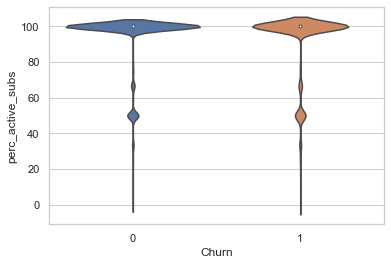

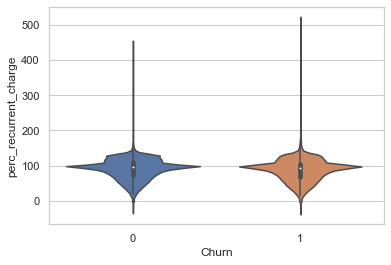

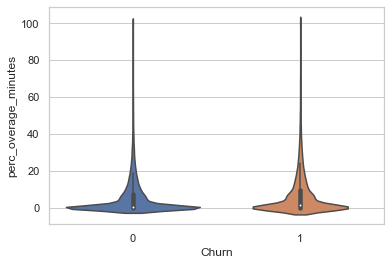

In [38]:
#check distribution of churners and non-churners of the new features added
plot_violin(cust_df2, new_features_cols, col_x = 'Churn')

In [39]:
#check churn rate of new features
churn_rate_new = cust_df2.groupby('Churn').agg({'perc_active_subs':'sum','perc_recurrent_charge':'sum','perc_overage_minutes':'sum'}).apply(lambda r: r/r.sum(), axis=0)
churn_rate_new.transpose()

Churn,0,1
perc_active_subs,0.715952,0.284048
perc_recurrent_charge,0.718490,0.281510
perc_overage_minutes,0.669049,0.330951


## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [40]:
check_features_to_drop = ['HandsetRefurbished','HandsetWebCapable',
             'TruckOwner','RVOwner','OptOutMailings','NonUSTravel',
             'OwnsComputer','NewCellphoneUser','NotNewCellphoneUser',
             'OwnsMotorcycle','MadeCallToRetentionTeam']

In [41]:
for col in cust_df2[check_features_to_drop]:
    result = (cust_df2[col]=='Yes').sum() / len(cust_df2[col])*100
    print(col,': ',result)

HandsetRefurbished :  13.893297282470268
HandsetWebCapable :  90.20552910519407
TruckOwner :  18.658280922431867
RVOwner :  8.136914908207448
OptOutMailings :  1.473383099198652
NonUSTravel :  5.640784498128882
OwnsComputer :  18.54072376026176
NewCellphoneUser :  19.24802601931856
NotNewCellphoneUser :  13.77769940633633
OwnsMotorcycle :  1.3303552185583571
MadeCallToRetentionTeam :  3.418954133113893


The difference in % of Yes and No in these columns are too big to give an accurate prediction.

### Reasons for dropping:
CustomerID and ServiceArea are not predictive features.

Columns 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam' have a dominant category with very few cases of other categories. These features are likely to have very little power to separate the cases. 

'MaritalStatus' has too many unknowns to be predictive.

### Modelling

In [42]:
cat_cols2 = ['ChildrenInHH','HandsetRefurbished','HandsetWebCapable',
             'TruckOwner','RVOwner','Homeownership','BuysViaMailOrder',
             'RespondsToMailOffers','OptOutMailings','NonUSTravel',
             'OwnsComputer','HasCreditCard','NewCellphoneUser',
             'NotNewCellphoneUser','IncomeGroup', 'MadeCallToRetentionTeam',
             'AdjustmentsToCreditRating','OwnsMotorcycle',
             'CreditRating','PrizmCode','Occupation','MaritalStatus']

In [43]:
#dropping the list of columns which are identified as non predictive for churn
drop_list = ['CustomerID','HandsetRefurbished','HandsetWebCapable',
             'TruckOwner','RVOwner','OptOutMailings','NonUSTravel',
             'OwnsComputer','NewCellphoneUser','NotNewCellphoneUser',
             'OwnsMotorcycle','MadeCallToRetentionTeam','AdjustmentsToCreditRating',
             'RetentionCalls','RetentionOffersAccepted','ServiceArea',
             'Occupation','MaritalStatus']

cust_df2 = cust_df2.drop(drop_list,axis=1)

In [44]:
#Create dummy variables for all categorical variables
cat_cols2 = ['ChildrenInHH','Homeownership','BuysViaMailOrder',
             'RespondsToMailOffers','HasCreditCard','IncomeGroup',
             'CreditRating','PrizmCode']

model_df = pd.get_dummies(data=cust_df2, columns=cat_cols2)

In [45]:
model_df.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ReferralsMadeBySubscriber,HandsetPrice,perc_active_subs,perc_recurrent_charge,perc_overage_minutes,ChildrenInHH_No,ChildrenInHH_Yes,Homeownership_Known,Homeownership_Unknown,BuysViaMailOrder_No,BuysViaMailOrder_Yes,RespondsToMailOffers_No,RespondsToMailOffers_Yes,HasCreditCard_No,HasCreditCard_Yes,IncomeGroup_0,IncomeGroup_1,IncomeGroup_2,IncomeGroup_3,IncomeGroup_4,IncomeGroup_5,IncomeGroup_6,IncomeGroup_7,IncomeGroup_8,IncomeGroup_9,CreditRating_1-Highest,CreditRating_2-High,CreditRating_3-Good,CreditRating_4-Medium,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,2.0,2.0,361.0,62.0,0.0,0,30,50.0,91.666667,0.000000,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,2.0,1.0,1504.0,40.0,42.0,0,30,100.0,100.058858,0.000000,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,1.0,1.0,1812.0,26.0,26.0,0,0,100.0,100.000000,0.000000,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,9.0,4.0,458.0,30.0,0.0,0,10,100.0,91.152163,0.000000,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,4.0,3.0,852.0,46.0,54.0,0,10,100.0,99.183197,6.286344,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0


### Separate data into Predictive Variables and Target Variable (Churn). Split into train and test sets for modelling and scale

In [46]:
#establish target feature = churn and dropping target feature from remaining features
X = model_df.iloc[:, model_df.columns != 'Churn']
y = model_df.iloc[:, model_df.columns == 'Churn']

#train - test split to train and test model accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Feature scaling for all continuous variable
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


### Machine Learning Utils

In [47]:
def get_score(model, pred):
    probs = model.predict_proba(X_test_std)
    probs = probs[:, 1]
    auc = roc_auc_score(y_test, probs)
    mae = metrics.mean_absolute_error(y_test, pred)
    mse = metrics.mean_squared_error(y_test, pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
    accuracy = metrics.accuracy_score(y_test, pred)
    precision = metrics.precision_score(y_test, pred)
    recall = metrics.recall_score(y_test, pred)
    f1 = 2*(precision*recall)/(precision+recall)
    gini = 2*auc-1
     
    print('Mean Absolute Error:', mae)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print("\nAccuracy:", accuracy)
    print("Precision:",precision)
    print("Recall:", recall)
    print("F1:",f1)
    print("GINI:",gini)

In [48]:
def get_confusion_matrix(matrix,TITLE):
    class_names=[0,1] # name of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title(TITLE,fontsize=15)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label');

In [49]:
def get_roc_curve(model,TITLE,name):
    #ROC curve
    plt.figure(figsize=(8,8))

    probs = model.predict_proba(X_test_std)
    probs = probs[:, 1]

    auc = roc_auc_score(y_test, probs)

    #summarize scores
    print('No Skill : ROC AUC = 0.50')
    print(name,': ROC AUC = %.2f' % (auc))

    #calculate roc curves
    fpr, tpr, thresholds = roc_curve(y_test, probs)

    #plot the roc curve for the model
    plt.plot(fpr, tpr, color='orangered',
    lw=2, label='Model (area = %0.2f)' % auc)
    plt.title(TITLE,fontsize=15)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='dashed', label='No skill (area = 0.5)')

    plt.xlabel('False Positive Rate',fontsize=13)
    plt.ylabel('True Positive Rate',fontsize=13)

    plt.legend()
    plt.show();

### Building the Machine Learning Models

In [50]:
#instantiate a logistic regression model
#fit the model into X and y training sets
logreg = LogisticRegression()
logreg.fit(X_train_std,y_train)

#predict for X_test data set using the fitted model
#probability threshold to classify customers as churners and non churners (Default = 0.5)
lr_y_pred = logreg.predict(X_test_std)

LogisticRegression()

In [51]:
#get model scores
lr_cnf_matrix = metrics.confusion_matrix(y_test, lr_y_pred)
lr_cnf_matrix
get_score(logreg,lr_y_pred)

array([[10755,    87],
       [ 4383,    87]], dtype=int64)

Mean Absolute Error: 0.2919278996865204
Mean Squared Error: 0.2919278996865204
Root Mean Squared Error: 0.5403035255173895

Accuracy: 0.7080721003134797
Precision: 0.5
Recall: 0.019463087248322148
F1: 0.037467700258397935
GINI: 0.21494416237789316


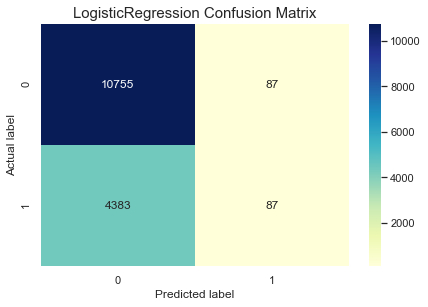

In [52]:
get_confusion_matrix(lr_cnf_matrix,TITLE='LogisticRegression Confusion Matrix')

No Skill : ROC AUC = 0.50
Logistic Regression : ROC AUC = 0.61


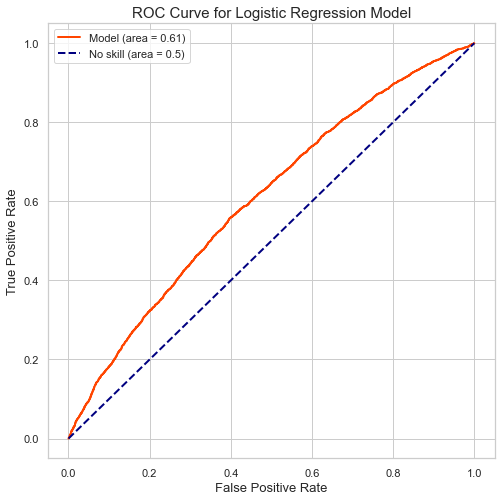

In [53]:
get_roc_curve(logreg,TITLE='ROC Curve for Logistic Regression Model',name='Logistic Regression')

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [54]:
#train random forest model with train set and predict using test set
rf = RandomForestClassifier(n_estimators=100, random_state = 0)
rf.fit(X_train_std,y_train)

rf_y_pred = rf.predict(X_test_std)

RandomForestClassifier(random_state=0)

In [55]:
#get model scores
get_score(rf, rf_y_pred)

Mean Absolute Error: 0.28689916405433646
Mean Squared Error: 0.28689916405433646
Root Mean Squared Error: 0.535629689295073

Accuracy: 0.7131008359456635
Precision: 0.5634266886326195
Recall: 0.07651006711409396
F1: 0.13472523143588733
GINI: 0.32030769808520754


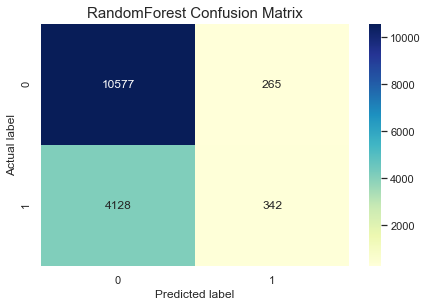

In [56]:
rf_cnf_matrix = metrics.confusion_matrix(y_test, rf_y_pred)
get_confusion_matrix(rf_cnf_matrix,TITLE='RandomForest Confusion Matrix')

No Skill: ROC AUC = 0.50
LogisticRegression: ROC AUC = 0.607
RandomForest: ROC AUC = 0.660


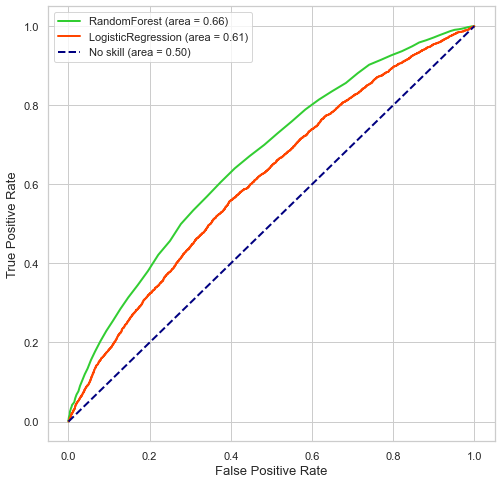

In [57]:
#ROC curve
plt.figure(figsize=(8,8))

lr_probs = logreg.predict_proba(X_test_std)
lr_probs = lr_probs[:, 1]
rf_probs = rf.predict_proba(X_test_std)
rf_probs = rf_probs[:, 1]

lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
#summarize scores
print('No Skill: ROC AUC = 0.50')
print('LogisticRegression: ROC AUC = %.3f' % (lr_auc))
print('RandomForest: ROC AUC = %.3f' % (rf_auc))

#calculate roc curves
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf_probs)

#plot randomforest roc curve for the model
plt.plot(rf_fpr, rf_tpr, color='limegreen',
 lw=2, label='RandomForest (area = %0.2f)' % rf_auc)

#plot logisticregression roc curve for the model
plt.plot(lr_fpr, lr_tpr, color='orangered',
 lw=2, label='LogisticRegression (area = %0.2f)' % lr_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='dashed', label='No skill (area = 0.50)')

plt.xlabel('False Positive Rate',fontsize=13)
plt.ylabel('True Positive Rate',fontsize=13)

plt.legend()
plt.show();

<mark>__Result:__
    
Random Forest model is more superior compared to Logistic Regression model in predicting churners. Random Forest model also has higher F1, GINI, AUC, and Accuracy score.

### Q4.3 Identify most important features impacting churn

In [58]:
features = SelectFromModel(RandomForestClassifier(n_estimators = 100))
features.fit(X_train_std, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [59]:
#check selected features
selected_features = X.columns[(features.get_support())]
selected_features

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ReceivedCalls',
       'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut',
       'DroppedBlockedCalls', 'CallWaitingCalls', 'MonthsInService',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'perc_recurrent_charge',
       'perc_overage_minutes'],
      dtype='object')

In [60]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created
from sklearn.ensemble import RandomForestClassifier

feature_imp = pd.DataFrame(rf.feature_importances_, index=X.columns,columns=['Importance']).sort_values('Importance',ascending=False)
feature_imp = feature_imp.head(20)
feature_imp

,Importance
CurrentEquipmentDays,0.057720
PercChangeMinutes,0.048786
MonthlyMinutes,0.046578
perc_recurrent_charge,0.045247
MonthsInService,0.043108
MonthlyRevenue,0.041389
PercChangeRevenues,0.040477
PeakCallsInOut,0.037570
OffPeakCallsInOut,0.035885
UnansweredCalls,0.035800


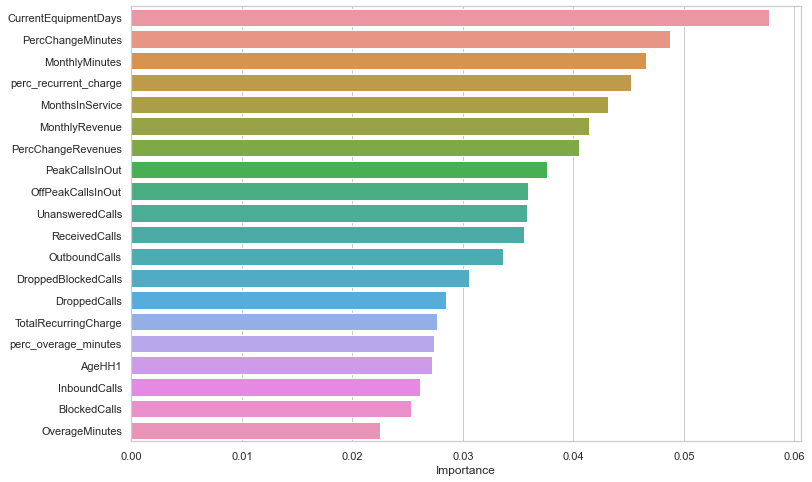

In [61]:
#plot top 20 important features from random forest classifier
plt.figure(figsize=(12,8))
sns.barplot(x=feature_imp['Importance'], y=feature_imp.index);

### Using top features for Random Forest model

In [62]:
X = model_df[selected_features]
y = model_df.iloc[:, model_df.columns == 'Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [63]:
rf2 = RandomForestClassifier(n_estimators=100, random_state = 0)
rf2.fit(X_train_std,y_train)

rf2_y_pred = rf2.predict(X_test_std)

RandomForestClassifier(random_state=0)

In [64]:
get_score(rf2,rf2_y_pred)

Mean Absolute Error: 0.2848746081504702
Mean Squared Error: 0.2848746081504702
Root Mean Squared Error: 0.5337364594539802

Accuracy: 0.7151253918495298
Precision: 0.5661764705882353
Recall: 0.10335570469798658
F1: 0.17480136208853575
GINI: 0.3099289902100004


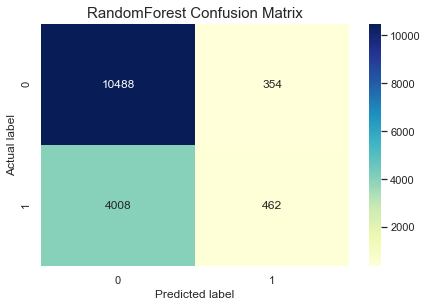

In [65]:
rf2_cnf_matrix = metrics.confusion_matrix(y_test, rf2_y_pred)
get_confusion_matrix(rf2_cnf_matrix,TITLE='RandomForest Confusion Matrix')

No Skill : ROC AUC = 0.50
Random Forest top 25 features : ROC AUC = 0.65


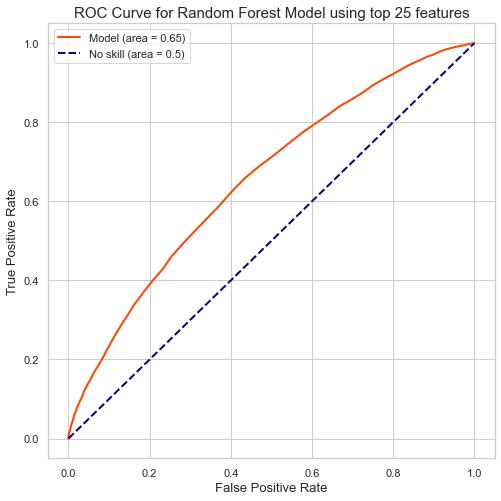

In [66]:
get_roc_curve(rf2,TITLE='ROC Curve for Random Forest Model using top 25 features',
              name='Random Forest top 25 features')

## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

### Prepare hold out data set to fit best model identified (Random Forest model with top features)

In [67]:
#Type your code here to predict churners based on the hold out data set provided
#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4

#Use "predict" function on the transformend data using the best fitted model object

holdout_df = pd.read_csv("Mini_project_3_Hold_Out_Data.csv")
holdout_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,1.0,61.3,1.7,0.3,55.3,46.3,6.3,83.7,157.0,9.3,0.0,5.7,56,1,1,MILMIL414,7,6,240,30.0,0.0,No,No,Yes,Yes,Yes,Unknown,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,0.7,77.0,8.7,0.0,106.3,14.7,0.7,97.3,90.3,10.3,0.0,0.0,57,1,1,NNYSYR315,6,4,434,56.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,Yes,No,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,3.0,176.0,11.3,0.3,213.9,103.3,0.3,238.3,192.3,15.7,0.0,4.0,55,1,1,MILMIL414,3,3,700,38.0,24.0,No,No,No,No,No,Unknown,No,No,No,No,No,No,0,0,Yes,No,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,0.7,17.3,0.0,0.0,33.1,8.0,4.7,48.3,7.0,2.7,0.0,0.3,59,3,2,SLCSLC801,6,5,48,46.0,0.0,Yes,No,Yes,Yes,Yes,Known,Yes,Yes,Yes,No,No,Yes,0,0,No,Yes,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,6.0,43.7,4.3,0.0,490.1,50.7,8.3,189.3,105.0,8.7,0.0,4.3,52,1,1,OKCTUL918,4,4,408,58.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,3,No,0,10,No,1-Highest,Suburban,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3399938,NaN,85.15,815.0,88.0,0.00,1.0,0.4,0.0,0.0,12.0,0.0,15.3,0.0,1.3,141.0,9.0,3.3,72.0,38.7,12.0,0.0,0.0,27,3,2,LAXVNY818,3,3,230,64.0,64.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,No,No,0,0,No,0,40,No,1-Highest,Other,Other,Unknown
19996,3399950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.7,0.0,0.0,0.0,25,1,1,LAXRIV909,1,1,773,34.0,26.0,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,No,No,0,6,No,0,Unknown,No,1-Highest,Suburban,Other,Yes
19997,3399966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.3,0.7,0.3,5.3,3.3,0.0,0.0,0.0,25,1,1,LAXCOR909,1,1,773,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,8,No,1,Unknown,No,1-Highest,Suburban,Other,No
19998,3399970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,3.3,26.7,4.3,0.0,235.4,35.0,3.3,146.3,115.3,22.3,0.0,6.3,25,1,1,LAXLAG949,3,2,32,28.0,48.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,No,No,0,3,No,0,150,No,3-Good,Other,Other,Unknown


In [68]:
holdout_df['HandsetPrice'].replace({'Unknown':0},inplace=True)
holdout_df['HandsetPrice'] = holdout_df['HandsetPrice'].astype(int)

In [69]:
#drop columns not needed
holdout_df2 = holdout_df.drop(drop_list,axis=1)

In [70]:
#get new features
holdout_df2 = create_features(holdout_df)

In [71]:
#impute nulls with mean value
holdout_df2.fillna(holdout_df.mean(),inplace=True)

In [72]:
holdout_df2

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes
0,3000006,NaN,57.490000,483.000000,37.00000,0.250000,23.000000,0.000000,532.000000,51.000000,8.3,1.0,61.3,1.7,0.3,55.3,46.3,6.3,83.7,157.0,9.3,0.0,5.7,56,1,1,MILMIL414,7,6,240,30.0,0.0,No,No,Yes,Yes,Yes,Unknown,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,5,No,1,150,No,5-Low,Other,Other,No,100.000000,64.359019,4.761905
1,3000018,NaN,55.230000,570.000000,72.00000,0.000000,0.000000,0.000000,38.000000,0.000000,9.7,0.7,77.0,8.7,0.0,106.3,14.7,0.7,97.3,90.3,10.3,0.0,0.0,57,1,1,NNYSYR315,6,4,434,56.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,Yes,No,0,6,No,2,80,No,1-Highest,Other,Professional,No,100.000000,130.363933,0.000000
2,3000034,NaN,97.340000,1039.000000,50.00000,4.950000,420.000000,0.000000,198.000000,23.300000,12.7,3.0,176.0,11.3,0.3,213.9,103.3,0.3,238.3,192.3,15.7,0.0,4.0,55,1,1,MILMIL414,3,3,700,38.0,24.0,No,No,No,No,No,Unknown,No,No,No,No,No,No,0,0,Yes,No,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes,100.000000,51.366345,40.423484
3,3000070,NaN,35.590000,153.000000,30.00000,0.000000,16.000000,0.000000,30.000000,7.300000,2.0,0.7,17.3,0.0,0.0,33.1,8.0,4.7,48.3,7.0,2.7,0.0,0.3,59,3,2,SLCSLC801,6,5,48,46.0,0.0,Yes,No,Yes,Yes,Yes,Known,Yes,Yes,Yes,No,No,Yes,0,0,No,Yes,0,4,No,1,200,No,1-Highest,Other,Other,No,66.666667,84.293341,10.457516
4,3000074,NaN,55.270000,1213.000000,50.00000,0.740000,0.000000,1.300000,169.000000,1.000000,2.7,6.0,43.7,4.3,0.0,490.1,50.7,8.3,189.3,105.0,8.7,0.0,4.3,52,1,1,OKCTUL918,4,4,408,58.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,Yes,0,3,No,0,10,No,1-Highest,Suburban,Other,No,100.000000,90.464990,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3399938,NaN,85.150000,815.000000,88.00000,0.000000,1.000000,0.400000,0.000000,0.000000,12.0,0.0,15.3,0.0,1.3,141.0,9.0,3.3,72.0,38.7,12.0,0.0,0.0,27,3,2,LAXVNY818,3,3,230,64.0,64.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,No,No,0,0,No,0,40,No,1-Highest,Other,Other,Unknown,66.666667,103.347035,0.122699
19996,3399950,NaN,58.899712,525.912136,46.94664,0.893764,40.240722,1.186765,-9.052806,-1.237246,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.7,0.0,0.0,0.0,25,1,1,LAXRIV909,1,1,773,34.0,26.0,No,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,No,No,0,6,No,0,0,No,1-Highest,Suburban,Other,Yes,100.000000,90.272573,6.258743
19997,3399966,NaN,58.899712,525.912136,46.94664,0.893764,40.240722,1.186765,-9.052806,-1.237246,0.0,0.0,0.0,0.0,0.0,1.3,0.7,0.3,5.3,3.3,0.0,0.0,0.0,25,1,1,LAXCOR909,1,1,773,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,8,No,1,0,No,1-Highest,Suburban,Other,No,100.000000,90.272573,6.258743
19998,3399970,NaN,58.899712,525.912136,46.94664,0.893764,40.240722,1.186765,-9.052806,-1.237246,19.0,3.3,26.7,4.3,0.0,235.4,35.0,3.3,146.3,115.3,22.3,0.0,6.3,25,1,1,LAXLAG949,3,2,32,28.0,48.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,No,No,0,3,No,0,150,No,3-Good,Other,Other,Unknown,100.000000,90.272573,6.25

In [73]:
#create dummies for categorical columns in holdout data
holdout_df2 = pd.get_dummies(data=holdout_df2, columns=cat_cols2)
holdout_df2

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,OptOutMailings,NonUSTravel,OwnsComputer,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes,ChildrenInHH_No,ChildrenInHH_Yes,Homeownership_Known,Homeownership_Unknown,BuysViaMailOrder_No,BuysViaMailOrder_Yes,RespondsToMailOffers_No,RespondsToMailOffers_Yes,HasCreditCard_No,HasCreditCard_Yes,IncomeGroup_0,IncomeGroup_1,IncomeGroup_2,IncomeGroup_3,IncomeGroup_4,IncomeGroup_5,IncomeGroup_6,IncomeGroup_7,IncomeGroup_8,IncomeGroup_9,CreditRating_1-Highest,CreditRating_2-High,CreditRating_3-Good,CreditRating_4-Medium,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town
0,3000006,NaN,57.490000,483.000000,37.00000,0.250000,23.000000,0.000000,532.000000,51.000000,8.3,1.0,61.3,1.7,0.3,55.3,46.3,6.3,83.7,157.0,9.3,0.0,5.7,56,1,1,MILMIL414,7,6,240,30.0,0.0,No,Yes,Yes,Yes,No,No,No,0,0,No,Yes,0,No,1,150,No,Other,No,100.000000,64.359019,4.761905,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,3000018,NaN,55.230000,570.000000,72.00000,0.000000,0.000000,0.000000,38.000000,0.000000,9.7,0.7,77.0,8.7,0.0,106.3,14.7,0.7,97.3,90.3,10.3,0.0,0.0,57,1,1,NNYSYR315,6,4,434,56.0,0.0,No,Yes,No,No,No,No,Yes,0,0,Yes,No,0,No,2,80,No,Professional,No,100.000000,130.363933,0.000000,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3000034,NaN,97.340000,1039.000000,50.00000,4.950000,420.000000,0.000000,198.000000,23.300000,12.7,3.0,176.0,11.3,0.3,213.9,103.3,0.3,238.3,192.3,15.7,0.0,4.0,55,1,1,MILMIL414,3,3,700,38.0,24.0,No,No,No,No,No,No,No,0,0,Yes,No,0,No,3,10,No,Crafts,Yes,100.000000,51.366345,40.423484,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,3000070,NaN,35.590000,153.000000,30.00000,0.000000,16.000000,0.000000,30.000000,7.300000,2.0,0.7,17.3,0.0,0.0,33.1,8.0,4.7,48.3,7.0,2.7,0.0,0.3,59,3,2,SLCSLC801,6,5,48,46.0,0.0,No,Yes,Yes,Yes,Yes,No,No,0,0,No,Yes,0,No,1,200,No,Other,No,66.666667,84.293341,10.457516,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,3000074,NaN,55.270000,1213.000000,50.00000,0.740000,0.000000,1.300000,169.000000,1.000000,2.7,6.0,43.7,4.3,0.0,490.1,50.7,8.3,189.3,105.0,8.7,0.0,4.3,52,1,1,OKCTUL918,4,4,408,58.0,0.0,No,Yes,No,No,No,No,No,0,0,No,Yes,0,No,0,10,No,Other,No,100.000000,90.464990,0.000000,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3399938,NaN,85.150000,815.000000,88.00000,0.000000,1.000000,0.400000,0.000000,0.000000,12.0,0.0,15.3,0.0,1.3,141.0,9.0,3.3,72.0,38.7,12.0,0.0,0.0,27,3,2,LAXVNY818,3,3,230,64.0,64.0,No,Yes,No,No,No,No,No,0,0,No,No,0,No,0,40,No,Other,Unknown,66.666667,103.347035,0.122699,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
19996,3399950,NaN,58.899712,525.912136,46.94664,0.893764,40.240722,1.186765,-9.052806,-1.237246,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.7,0.0,0.0,0.0,25,1,1,LAXRIV909,1,1,773,34.0,26.0,No,Yes,No,No,No,No,Yes,0,0,No,No,0,No,0,0,No,Other,Yes,100.000000,90.2725

### Scale predictive variables and fit into model rf2

In [74]:
X = holdout_df2[selected_features]

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [75]:
holdout_y_pred = rf2.predict(X_scaled)
holdout_df['Churn'] = pd.DataFrame(data = holdout_y_pred)

In [76]:
#inserting the probability of churn to hold out data
y_probas = rf2.predict_proba(X_scaled)
churn = pd.DataFrame(y_probas)
holdout_df['ChurnProbability'] = churn[churn.columns[1]]
holdout_df = holdout_df.sort_values('ChurnProbability',ascending=False)

In [77]:
#check the predicted churners and their churn probability on the hold out data
holdout_df[holdout_df['Churn']==1]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minutes,ChurnProbability
14744,3299358,1,35.09,6.0,45.0,0.00,0.0,0.1,-6.0,-0.1,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.7,0.0,0.0,0.0,0.0,12,1,1,NNYSYR315,1,1,338,0.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,4,No,0,0,No,7-Lowest,Other,Other,Unknown,100.0,128.241664,0.000000,0.78
16560,3334918,1,42.49,26.0,52.0,0.00,0.0,0.0,-26.0,-7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,1,1,NNYBUF716,1,1,307,54.0,50.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,0,No,3-Good,Other,Other,No,100.0,122.381737,0.000000,0.77
15514,3314102,1,40.15,8.0,50.0,0.00,0.0,0.2,20.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.0,0.3,1.0,0.0,0.0,0.0,11,1,1,BOSBOS617,1,1,322,32.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,1,No,0,0,No,2-High,Other,Other,No,100.0,124.533001,0.000000,0.74
15136,3306346,1,34.99,8.0,45.0,0.00,0.0,0.0,-8.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.7,1.0,0.0,0.0,0.0,11,1,1,AIRAUG706,1,1,331,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,0,No,2-High,Other,Other,Unknown,100.0,128.608174,0.000000,0.74
15104,3305762,1,35.24,4.0,45.0,0.25,0.0,0.0,-4.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,1,1,HWIHON808,1,1,332,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,0,No,7-Lowest,Other,Other,Unknown,100.0,127.695800,0.000000,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12302,3249354,1,53.05,571.0,40.0,1.24,59.0,0.9,78.0,29.1,7.7,3.0,31.7,0.0,0.3,73.5,31.7,3.7,110.7,112.0,10.7,0.0,3.0,10,1,1,SFROAK510,1,1,307,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,Yes,No,0,0,No,0,0,No,4-Medium,Other,Other,Unknown,100.0,75.400566,10.332750,0.51
154,3003382,1,135.18,628.0,40.0,0.00,47.0,51.4,-30.0,-33.7,2.7,1.3,10.0,0.0,0.0,197.2,27.7,9.7,72.0,45.0,4.0,0.0,0.3,52,1,1,DALFTW817,2,2,584,0.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,No,0,0,No,Yes,0,7,No,0,30,No,1-Highest,Other,Other,No,100.0,29.590176,7.484076,0.51
12371,3250706,1,44.74,378.0,39.0,0.00,44.0,0.0,-378.0,-14.8,2.3,0.0,12.7,0.0,0.0,85.0,2.0,0.3,40.3,34.3,2.3,0.0,0.0,14,1,1,STLJOS816,1,1,412,48.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,No,0,0,Yes,No,0,6,No,0,0,No,5-Low,Rural,Other,No,100.0,87.170317,11.640212,0.51
12555,3254118,1,34.26,490.0,40.0,0.25,12.0,0.0,-27.0,-2.9,4.0,42.7,92.7,10.3,0.3,124.7,24.7,2.3,117.0,118.7,46.7,0.0,3.3,14,1,1,NCRVIR757,2,2,283,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,Yes,0,0,No,No,0,7,No,0,80,No,2-High,Suburban,Other,Unknown,100.0,116.754232,2.448980,0.51


## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

In [78]:
#calculate model lift
def lift (test, pred, cardinaility):

    res = pd.DataFrame(np.column_stack((test, pred)),
                       columns=['Target','PR_0', 'PR_1'])

    res['scr_grp'] = pd.qcut(res['PR_0'], cardinaility, labels=False)+1

    crt = pd.crosstab(res.scr_grp, res.Target).reset_index()
    crt = crt.rename(columns= {'Target':'Np',0.0: 'Non-Churners', 1.0: 'Churners'})

    G = crt['Churners'].sum()
    B = crt['Non-Churners'].sum()
   
    avg_resp_rate = G/(G+B)

    crt['resp_rate'] = round(crt['Churners']/(crt['Churners']+crt['Non-Churners']),2)
    crt['lift'] = round((crt['resp_rate']/avg_resp_rate),2)
    crt['rand_resp'] = 1/cardinaility
    crt['cmltv_p'] = round((crt['Churners']).cumsum(),2)
    crt['cmltv_p_perc'] = round(((crt['Churners']/G).cumsum())*100,1)
    crt['cmltv_n'] = round((crt['Non-Churners']).cumsum(),2)  
    crt['cmltv_n_perc'] = round(((crt['Non-Churners']/B).cumsum())*100,1)   
    crt['cmltv_rand_p_perc'] = (crt.rand_resp.cumsum())*100
    crt['cmltv_resp_rate'] = round(crt['cmltv_p']/(crt['cmltv_p']+crt['cmltv_n']),2)   
    crt['cmltv_lift'] = round(crt['cmltv_resp_rate']/avg_resp_rate,2)
    crt['KS']=round(crt['cmltv_p_perc']-crt['cmltv_rand_p_perc'],2)
    crt = crt.drop(['rand_resp','cmltv_p','cmltv_n',], axis=1)
    
    print('average response rate: ' , avg_resp_rate)
    return crt

In [79]:
X = model_df[selected_features]
y = model_df.iloc[:, model_df.columns == 'Churn']

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

### Check Model Lift and top deciles to target

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

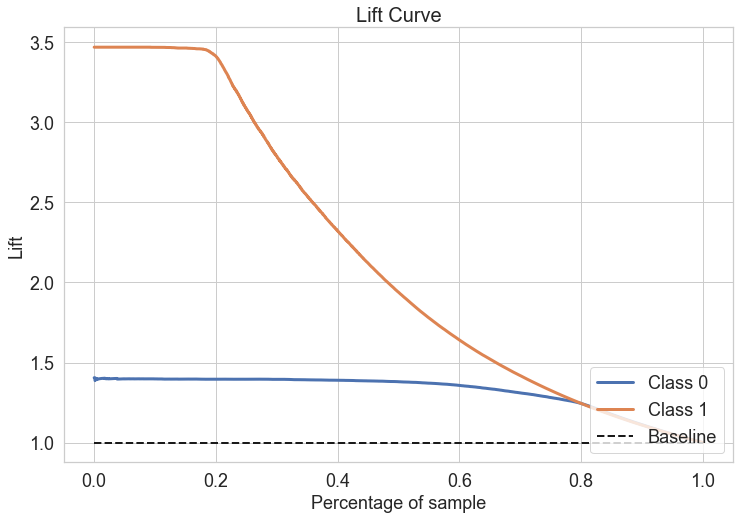

In [80]:
#Type your code here to plot the lift chart from the best model
#Identify the lift i.e. 3x of capturing churn with and without using the model 
#(Assume: only top 20% high risk customers are to be targetted)
y_probas = rf2.predict_proba(X_scaled)
skplt.metrics.plot_lift_curve(y, y_probas, figsize=(12, 8), 
                              title_fontsize=20, text_fontsize=18);
plt.show()


<mark>The ideal lift is the top 20% of churners, and a model lift of around 3.5 times compared to no model at all.

In [81]:
ModelLift=lift(y,y_probas,10)
ModelLift

average response rate:  0.2881717901996512


Target,scr_grp,Non-Churners,Churners,resp_rate,lift,cmltv_p_perc,cmltv_n_perc,cmltv_rand_p_perc,cmltv_resp_rate,cmltv_lift,KS
0,1,1,5204,1.00,3.47,35.4,0.0,10.0,1.00,3.47,25.4
1,2,194,4912,0.96,3.33,68.8,0.5,20.0,0.98,3.40,48.8
2,3,2962,2259,0.43,1.49,84.1,8.7,30.0,0.80,2.78,54.1
3,4,3890,1358,0.26,0.90,93.4,19.4,40.0,0.66,2.29,53.4
4,5,4270,531,0.11,0.38,97.0,31.1,50.0,0.56,1.94,47.0
5,6,5120,225,0.04,0.14,98.5,45.2,60.0,0.47,1.63,38.5
6,7,5222,117,0.02,0.07,99.3,59.6,70.0,0.40,1.39,29.3
7,8,5473,41,0.01,0.03,99.6,74.7,80.0,0.35,1.21,19.6
8,9,4755,39,0.01,0.03,99.9,87.8,90.0,0.32,1.11,9.9
9,10,4444,22,0.00,0.00,100.0,100.0,100.0,0.29,1.01,0.0


In [82]:
dec = ['Decile 1','Decile 2','Decile 3','Decile 4','Decile 5','Decile 6','Decile 7','Decile 8','Decile 9','Decile 10',]
MLift=ModelLift[['Churners','Non-Churners','cmltv_lift','KS']].copy()
MLift.index = (dec)

In [83]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

MLift[['Churners','Non-Churners']].iplot(kind='bar',yTitle='Volume',xTitle='Model decile', title='Positives & Negatives by model decile')

In [84]:
MLift[['cmltv_lift']].iplot(kind='bar',color='LightSkyBlue',yTitle='Lift',xTitle='Model decile', title='Cumulative Lift', yrange=[1.11, 6])

<mark>This shows that the optimal selection is the top 20% (Decile 1 and 2) which gives a 3.40 times lift.

<mark>As we increase the targeted group, we will expect smaller Model Lift. If we decide to target top 30% instead of the top 10% and 20%, ROI will drop from 3.40 times (decile 1 and 2) to 2.78 times (decile 1, 2, and 3). Still, the Model Lift will be almost 3 times more successful than no model.

In [85]:
MLift[['KS']].iplot(kind='bar',color='DarkSlateGrey', yTitle='Separation',xTitle='Model decile', title='Target separation')

<mark>The best split according to above chart is around decile 3 and 4, we will be targeting the maximum number of churners with the minimum number of non-churners. However, we also know that for the first 2 deciles the number of non-churners are extremely low, so it is best to target the 1st 2 deciles instead.

In [86]:
top_churning_customers = ModelLift.iloc[0:2,2].sum()
print('There are',top_churning_customers,'customers from the top 20% of customers who are most likely to churn.')

There are 10116 customers from the top 20% of customers who are most likely to churn.


In [87]:
churn = pd.DataFrame(y_probas)
cust_df2['ChurnProbability'] = churn[churn.columns[1]]
churn_df = cust_df2.sort_values('ChurnProbability',ascending=False).head(top_churning_customers)
churn_rate = churn_df.Churn.mean()*100

churn_df
print('Churn rate of top 20%: ',churn_rate.round(2),'%')

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,Homeownership,BuysViaMailOrder,RespondsToMailOffers,HasCreditCard,ReferralsMadeBySubscriber,IncomeGroup,HandsetPrice,CreditRating,PrizmCode,perc_active_subs,perc_recurrent_charge,perc_overage_minutes,ChurnProbability
38564,0,36.45,284.0,45.0,0.25,0.0,0.8,-266.0,-1.5,1.0,4.0,10.0,0.3,0.0,25.7,16.0,0.3,32.3,22.0,5.0,0.0,0.0,7,1,1,1.0,1.0,221.0,58.0,0.0,No,Known,Yes,Yes,No,0,6,0,2-High,Other,100.000000,123.456790,0.000000,0.93
18124,0,67.92,176.0,52.0,1.65,0.0,0.9,-43.0,-20.0,1.0,0.0,9.7,0.0,0.3,19.3,0.3,0.0,15.7,4.0,1.0,0.0,0.0,24,1,1,2.0,1.0,61.0,36.0,36.0,Yes,Known,Yes,Yes,Yes,0,1,10,4-Medium,Town,100.000000,76.560660,0.000000,0.92
2088,1,55.37,430.0,30.0,0.00,73.0,0.0,170.0,65.4,5.7,0.7,13.3,0.0,0.0,68.0,13.3,0.0,90.3,25.3,6.3,0.0,0.0,34,2,1,1.0,1.0,1046.0,34.0,34.0,Yes,Known,Yes,Yes,Yes,0,5,0,1-Highest,Town,50.000000,54.180964,16.976744,0.91
30245,0,85.71,624.0,95.0,0.00,0.0,0.0,-17.0,-0.7,3.7,1.3,94.7,0.0,1.3,30.8,7.3,1.7,145.3,51.7,5.0,0.0,0.0,11,2,2,1.0,1.0,320.0,72.0,94.0,Yes,Known,No,No,Yes,0,8,0,2-High,Town,100.000000,110.838875,0.000000,0.91
35092,1,33.95,219.0,40.0,0.00,11.0,0.0,182.0,11.1,18.0,6.3,43.0,0.0,0.3,20.3,5.0,0.3,69.0,32.0,24.3,0.0,0.0,13,6,2,1.0,1.0,366.0,34.0,30.0,Yes,Known,No,No,Yes,0,4,0,1-Highest,Other,33.333333,117.820324,5.022831,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45961,0,94.12,1336.0,85.0,1.49,22.0,0.7,9.0,-9.6,6.3,7.7,54.7,4.7,0.0,303.9,14.3,0.7,265.0,126.0,14.0,0.0,3.7,9,2,1,1.0,1.0,254.0,50.0,60.0,No,Known,No,No,Yes,0,4,0,4-Medium,Suburban,50.000000,90.310242,1.646707,0.54
13686,1,30.00,0.0,30.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.0,0.0,0.7,0.0,0.0,0.0,26,1,1,1.0,1.0,762.0,30.0,24.0,No,Known,No,No,Yes,0,7,0,2-High,Town,100.000000,100.000000,6.286344,0.54
1773,0,17.61,49.0,17.0,0.00,0.0,0.0,2.0,1.9,0.0,0.0,3.7,0.0,0.0,9.4,0.7,0.7,13.0,16.7,0.0,0.0,0.3,41,2,2,1.0,1.0,1243.0,46.0,0.0,Yes,Known,No,No,Yes,0,4,0,1-Highest,Suburban,100.000000,96.536059,0.000000,0.54
46872,0,37.33,761.0,45.0,0.25,5.0,0.2,116.0,5.4,1.3,11.3,26.3,5.3,0.0,336.1,25.0,5.7,69.7,129.3,12.7,0.0,2.7,8,1,1,1.0,1.0,236.0,0.0,0.0,No,Unknown,No,No,Yes,0,2,0,5-Low,Town,100.000000,120.546477,0.657030,0.54


Churn rate of top 20%:  37.86 %


In [88]:
actual_churn_monthly_revenue = churn_df.groupby('Churn').agg({'MonthlyRevenue':'sum'}).round(2)
actual_churn_monthly_revenue

print('Monthly revenue of actual churners from top 20%: ',actual_churn_monthly_revenue.loc[1,'MonthlyRevenue'],'USD.')

,MonthlyRevenue
Churn,
0,371792.26
1,219064.94


Monthly revenue of actual churners from top 20%:  219064.94 USD.


<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?
    
<mark>The actual churn rate by targeting the top 20% of the customers is 37.86%.
    
    
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?
    
<mark>The total monthly revenue of actual churn customers in the top 20% is 219,064.94 USD.
   